<a href="https://colab.research.google.com/github/anish1050/Pandas-Google-Collab/blob/main/Experiment_02_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment No :** 02

**Aim :** To understand how to perform Data Manipulation with Pandas Library

**Theory :** NumPy library and its *ndarray* object, provides efficient storage and manipulation of dense typed arrays in Python. **Pandas** is a newer package built on top of NumPy, and provides an efficient implementation of a **DataFrame** data structure. **DataFrames** are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.

Pandas not only provide a convenient storage interface for labeled data
but also implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

Numpy's *ndarray* data structure is more suitable for clean, well-organized data typically seen in numerical computing tasks. While it serves this purpose very well, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (e.g., groupings, pivots, etc.), each of which is an important piece of analyzing the less structured data available in many forms in the world around us.

Pandas, and in particular its **Series** and **DataFrame** objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

The name Pandas has a reference to both *Panel Data*, and *Python Data Analysis* and was created by Wes McKinney in 2008. Pandas allows us to analyze big data and make conclusions based on statistical theories. Pandas can clean messy data sets, and make them readable and relevant. Relevant data is very important in any successful data science pipeline.

**Working :** These are actual Performance steps that students will carry out. Students need toexecute all cell and note the output also they need add apropriate comments to all cell to indicate what concept it describes.


## Installing and Using Pandas

Installation of Pandas on your system requires NumPy to be installed.

One can use any one of the following ways to install pandas to your native machine :

```
$ pip3 install pandas
```
OR

```
$ conda install pandas
```

Once Pandas is installed, you can import it and check the version:

In [1]:
import pandas
pandas.__version__

'2.2.2'

Just as we generally import NumPy under the alias ``np``, we will import Pandas under the alias ``pd``:

In [2]:
import pandas as pd

# Introducing Pandas Objects

At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.


Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures.

Before we go any further, let's introduce these three fundamental Pandas data structures: the ``Series``, ``DataFrame``, and ``Index``.

We will start our code sessions with the standard NumPy and Pandas imports:

In [3]:
#import numpy and pandas

### The Pandas Series Object


A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

,0
0,0.25
1,0.50
2,0.75
3,1.00


As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [7]:
data[1]

np.float64(0.5)

In [8]:
data[1:3]

,0
1,0.50
2,0.75


As we will see, though, the Pandas ``Series`` is much more general and flexible than the one-dimensional NumPy array that it emulates.

### ``Series`` as generalized NumPy array

From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array.
The essential difference is the presence of the index: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an *explicitly defined* index associated with the values.

This explicit index definition gives the ``Series`` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type.
For example, if we wish, we can use strings as an index:

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

,0
a,0.25
b,0.50
c,0.75
d,1.00


And the item access works as expected:

In [10]:
data['b']

np.float64(0.5)

We can even use non-contiguous or non-sequential indices:

In [11]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

,0
2,0.25
5,0.50
3,0.75
7,1.00


In [12]:
data[5]

np.float64(0.5)

### Series as specialized dictionary

In this way, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.

The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [13]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

,0
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


By default, a ``Series`` will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [14]:
population['California']

np.int64(38332521)

Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [15]:
population['California':'Illinois']

,0
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


### Constructing Series objects

We've already seen a few ways of constructing a Pandas ``Series`` from scratch; all of them are some version of the following:

```python
>>> pd.Series(data, index=index)
```

where ``index`` is an optional argument, and ``data`` can be one of many entities.

For example, ``data`` can be a list or NumPy array, in which case ``index`` defaults to an integer sequence:

In [16]:
pd.Series([2, 4, 6])

,0
0,2
1,4
2,6


``data`` can be a scalar, which is repeated to fill the specified index:

In [17]:
pd.Series(5, index=[100, 200, 300])

,0
100,5
200,5
300,5


``data`` can be a dictionary, in which ``index`` defaults to the sorted dictionary keys:

In [18]:
pd.Series({2:'a', 1:'b', 3:'c'})

,0
2,a
1,b
3,c


In each case, the index can be explicitly set if a different result is preferred:

In [19]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

,0
3,c
2,a


Notice that in this case, the ``Series`` is populated only with the explicitly identified keys.

## The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``.
Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
We'll now take a look at each of these perspectives.

### DataFrame as a generalized NumPy array
If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.
Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a ``DataFrame`` as a sequence of aligned ``Series`` objects.
Here, by "aligned" we mean that they share the same index.

To demonstrate this, let's first construct a new ``Series`` listing the area of each of the five states discussed in the previous section:

In [20]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

,0
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


Now that we have this along with the ``population`` Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [21]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [22]:
import pandas as pd
import numpy as np

Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the index labels:

In [23]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``Index`` object holding the column labels:

In [24]:
states.columns

Index(['population', 'area'], dtype='object')

Thus the ``DataFrame`` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

### DataFrame as specialized dictionary

Similarly, we can also think of a ``DataFrame`` as a specialization of a dictionary.
Where a dictionary maps a key to a value, a ``DataFrame`` maps a column name to a ``Series`` of column data.
For example, asking for the ``'area'`` attribute returns the ``Series`` object containing the areas we saw earlier:

In [25]:
states['area']

,area
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


Notice the potential point of confusion here: in a two-dimesnional NumPy array, ``data[0]`` will return the first *row*. For a ``DataFrame``, ``data['col0']`` will return the first *column*.
Because of this, it is probably better to think about ``DataFrame``s as generalized dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful.
We'll explore more flexible means of indexing ``DataFrame``s in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb).

### Constructing DataFrame objects

A Pandas ``DataFrame`` can be constructed in a variety of ways.
Here we'll give several examples.

#### From a single Series object

A ``DataFrame`` is a collection of ``Series`` objects, and a single-column ``DataFrame`` can be constructed from a single ``Series``:

In [26]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


#### From a list of dicts

Any list of dictionaries can be made into a ``DataFrame``.
We'll use a simple list comprehension to create some data:

In [27]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Even if some keys in the dictionary are missing, Pandas will fill them in with ``NaN`` (i.e., "not a number") values:

In [28]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a dictionary of Series objects

As we saw before, a ``DataFrame`` can be constructed from a dictionary of ``Series`` objects as well:

In [29]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


#### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a ``DataFrame`` with any specified column and index names.
If omitted, an integer index will be used for each:

In [30]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.638451,0.651583
b,0.541347,0.373533
c,0.731915,0.760457


#### From a NumPy structured array

A Pandas ``DataFrame`` operates much like a structured array in numpy, and can be created directly from one:

In [31]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [32]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## The Pandas Index Object

We have seen here that both the ``Series`` and ``DataFrame`` objects contain an explicit *index* that lets you reference and modify data.
This ``Index`` object is an interesting structure in itself, and it can be thought of either as an *immutable array* or as an *ordered set* (technically a multi-set, as ``Index`` objects may contain repeated values).
Those views have some interesting consequences in the operations available on ``Index`` objects.
As a simple example, let's construct an ``Index`` from a list of integers:

In [33]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Index([2, 3, 5, 7, 11], dtype='int64')

### Index as immutable array

The ``Index`` in many ways operates like an array.
For example, we can use standard Python indexing notation to retrieve values or slices:

In [34]:
ind[1]

np.int64(3)

In [35]:
ind[::2]

Index([2, 5, 11], dtype='int64')

``Index`` objects also have many of the attributes familiar from NumPy arrays:

In [36]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


One difference between ``Index`` objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means:

In [37]:
#ind[1] = 0

Error Explanation -
The error arises because you are attempting to modify an immutable Index object. The Index objects in Pandas are designed to be immutable, meaning they cannot be changed after creation. This is done to ensure data integrity and prevent unintended side effects when sharing indices between multiple DataFrames. You attempted to change the value of the ind object at index 1 using ind[1] = 0, which is not allowed.

This immutability makes it safer to share indices between multiple ``DataFrame``s and arrays, without the potential for side effects from inadvertent index modification.

### Index as ordered set

Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic.
The ``Index`` object follows many of the conventions used by Python's built-in ``set`` data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way:

In [38]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [39]:
indA & indB  # intersection

Index([0, 3, 5, 7, 9], dtype='int64')

In [40]:
indA | indB  # union

Index([3, 3, 5, 7, 11], dtype='int64')

In [41]:
indA ^ indB  # symmetric difference

Index([3, 0, 0, 0, 2], dtype='int64')

These operations may also be accessed via object methods, for example ``indA.intersection(indB)``.

# Updated till this section .......

We'll start with the simple case of the one-dimensional ``Series`` object, and then move on to the more complicated two-dimesnional ``DataFrame`` object.

## Data Selection in Series

As we saw in the previous section, a ``Series`` object acts in many ways like a one-dimensional NumPy array, and in many ways like a standard Python dictionary.
If we keep these two overlapping analogies in mind, it will help us to understand the patterns of data indexing and selection in these arrays.

### Series as dictionary

Like a dictionary, the ``Series`` object provides a mapping from a collection of keys to a collection of values:

In [42]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

,0
a,0.25
b,0.50
c,0.75
d,1.00


In [43]:
data['b']

np.float64(0.5)

We can also use dictionary-like Python expressions and methods to examine the keys/indices and values:

In [44]:
'a' in data

True

In [45]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [46]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

``Series`` objects can even be modified with a dictionary-like syntax.
Just as you can extend a dictionary by assigning to a new key, you can extend a ``Series`` by assigning to a new index value:

In [47]:
data['e'] = 1.25
data

,0
a,0.25
b,0.50
c,0.75
d,1.00
e,1.25


This easy mutability of the objects is a convenient feature: under the hood, Pandas is making decisions about memory layout and data copying that might need to take place; the user generally does not need to worry about these issues.

### Series as one-dimensional array

A ``Series`` builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays – that is, *slices*, *masking*, and *fancy indexing*.
Examples of these are as follows:

In [48]:
# slicing by explicit index
data['a':'c']

,0
a,0.25
b,0.50
c,0.75


In [49]:
# slicing by implicit integer index
data[0:2]

,0
a,0.25
b,0.50


In [50]:
# masking
data[(data > 0.3) & (data < 0.8)]

,0
b,0.50
c,0.75


In [51]:
# fancy indexing
data[['a', 'e']]

,0
a,0.25
e,1.25


Among these, slicing may be the source of the most confusion.
Notice that when slicing with an explicit index (i.e., ``data['a':'c']``), the final index is *included* in the slice, while when slicing with an implicit index (i.e., ``data[0:2]``), the final index is *excluded* from the slice.

### Indexers: loc, iloc, and ix

These slicing and indexing conventions can be a source of confusion.
For example, if your ``Series`` has an explicit integer index, an indexing operation such as ``data[1]`` will use the explicit indices, while a slicing operation like ``data[1:3]`` will use the implicit Python-style index.

In [52]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

,0
1,a
3,b
5,c


In [53]:
# explicit index when indexing
data[1]

'a'

In [54]:
# implicit index when slicing
data[1:3]

,0
3,b
5,c


Because of this potential confusion in the case of integer indexes, Pandas provides some special *indexer* attributes that explicitly expose certain indexing schemes.
These are not functional methods, but attributes that expose a particular slicing interface to the data in the ``Series``.

First, the ``loc`` attribute allows indexing and slicing that always references the explicit index:

In [55]:
data.loc[1]

'a'

In [56]:
data.loc[1:3]

,0
1,a
3,b


The ``iloc`` attribute allows indexing and slicing that always references the implicit Python-style index:

In [57]:
data.iloc[1]

'b'

In [58]:
data.iloc[1:3]

,0
3,b
5,c


A third indexing attribute, ``ix``, is a hybrid of the two, and for ``Series`` objects is equivalent to standard ``[]``-based indexing.
The purpose of the ``ix`` indexer will become more apparent in the context of ``DataFrame`` objects, which we will discuss in a moment.

One guiding principle of Python code is that "explicit is better than implicit."
The explicit nature of ``loc`` and ``iloc`` make them very useful in maintaining clean and readable code; especially in the case of integer indexes, I recommend using these both to make code easier to read and understand, and to prevent subtle bugs due to the mixed indexing/slicing convention.

## Data Selection in DataFrame

Recall that a ``DataFrame`` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of ``Series`` structures sharing the same index.
These analogies can be helpful to keep in mind as we explore data selection within this structure.

### DataFrame as a dictionary

The first analogy we will consider is the ``DataFrame`` as a dictionary of related ``Series`` objects.
Let's return to our example of areas and populations of states:

In [59]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


The individual ``Series`` that make up the columns of the ``DataFrame`` can be accessed via dictionary-style indexing of the column name:

In [60]:
data['area']

,area
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


Equivalently, we can use attribute-style access with column names that are strings:

In [61]:
data.area

,area
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


This attribute-style column access actually accesses the exact same object as the dictionary-style access:

In [62]:
data.area is data['area']

True

Though this is a useful shorthand, keep in mind that it does not work for all cases!
For example, if the column names are not strings, or if the column names conflict with methods of the ``DataFrame``, this attribute-style access is not possible.
For example, the ``DataFrame`` has a ``pop()`` method, so ``data.pop`` will point to this rather than the ``"pop"`` column:

In [63]:
data.pop is data['pop']

False

In particular, you should avoid the temptation to try column assignment via attribute (i.e., use ``data['pop'] = z`` rather than ``data.pop = z``).

Like with the ``Series`` objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case adding a new column:

In [64]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


This shows a preview of the straightforward syntax of element-by-element arithmetic between ``Series`` objects; we'll dig into this further in [Operating on Data in Pandas](03.03-Operations-in-Pandas.ipynb).

### DataFrame as two-dimensional array

As mentioned previously, we can also view the ``DataFrame`` as an enhanced two-dimensional array.
We can examine the raw underlying data array using the ``values`` attribute:

In [65]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

With this picture in mind, many familiar array-like observations can be done on the ``DataFrame`` itself.
For example, we can transpose the full ``DataFrame`` to swap rows and columns:

In [66]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


When it comes to indexing of ``DataFrame`` objects, however, it is clear that the dictionary-style indexing of columns precludes our ability to simply treat it as a NumPy array.
In particular, passing a single index to an array accesses a row:

In [67]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

and passing a single "index" to a ``DataFrame`` accesses a column:

In [68]:
data['area']

,area
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


Thus for array-style indexing, we need another convention.
Here Pandas again uses the ``loc``, ``iloc``, and ``ix`` indexers mentioned earlier.
Using the ``iloc`` indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the ``DataFrame`` index and column labels are maintained in the result:

In [69]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


Similarly, using the ``loc`` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

In [70]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


The ``ix`` indexer allows a hybrid of these two approaches:

In [71]:
data.loc[:data.index[2], :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


Keep in mind that for integer indices, the ``ix`` indexer is subject to the same potential sources of confusion as discussed for integer-indexed ``Series`` objects.

Any of the familiar NumPy-style data access patterns can be used within these indexers.
For example, in the ``loc`` indexer we can combine masking and fancy indexing as in the following:

In [72]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


Any of these indexing conventions may also be used to set or modify values; this is done in the standard way that you might be accustomed to from working with NumPy:

In [73]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


To build up your fluency in Pandas data manipulation, I suggest spending some time with a simple ``DataFrame`` and exploring the types of indexing, slicing, masking, and fancy indexing that are allowed by these various indexing approaches.

### Additional indexing conventions

There are a couple extra indexing conventions that might seem at odds with the preceding discussion, but nevertheless can be very useful in practice.
First, while *indexing* refers to columns, *slicing* refers to rows:

In [74]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Such slices can also refer to rows by number rather than by index:

In [75]:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


Similarly, direct masking operations are also interpreted row-wise rather than column-wise:

In [76]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


These two conventions are syntactically similar to those on a NumPy array, and while these may not precisely fit the mold of the Pandas conventions, they are nevertheless quite useful in practice.

# Operating on Data in Pandas

One of the essential pieces of NumPy is the ability to perform quick element-wise operations, both with basic arithmetic (addition, subtraction, multiplication, etc.) and with more sophisticated operations (trigonometric functions, exponential and logarithmic functions, etc.).
Pandas inherits much of this functionality from NumPy, and the ufuncs that we introduced in [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) are key to this.

Pandas includes a couple useful twists, however: for unary operations like negation and trigonometric functions, these ufuncs will *preserve index and column labels* in the output, and for binary operations such as addition and multiplication, Pandas will automatically *align indices* when passing the objects to the ufunc.
This means that keeping the context of data and combining data from different sources–both potentially error-prone tasks with raw NumPy arrays–become essentially foolproof ones with Pandas.
We will additionally see that there are well-defined operations between one-dimensional ``Series`` structures and two-dimensional ``DataFrame`` structures.

## Ufuncs: Index Preservation

Because Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas ``Series`` and ``DataFrame`` objects.
Let's start by defining a simple ``Series`` and ``DataFrame`` on which to demonstrate this:

In [77]:
import pandas as pd
import numpy as np

In [78]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

,0
0,6
1,3
2,7
3,4


In [79]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


If we apply a NumPy ufunc on either of these objects, the result will be another Pandas object *with the indices preserved:*

In [80]:
np.exp(ser)

,0
0,403.428793
1,20.085537
2,1096.633158
3,54.598150


Or, for a slightly more complex calculation:

In [81]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


Any of the ufuncs discussed in [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) can be used in a similar manner.

## UFuncs: Index Alignment

For binary operations on two ``Series`` or ``DataFrame`` objects, Pandas will align indices in the process of performing the operation.
This is very convenient when working with incomplete data, as we'll see in some of the examples that follow.

### Index alignment in Series

As an example, suppose we are combining two different data sources, and find only the top three US states by *area* and the top three US states by *population*:

In [82]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

Let's see what happens when we divide these to compute the population density:

In [83]:
population / area

,0
Alaska,NaN
California,90.413926
New York,NaN
Texas,38.018740


The resulting array contains the *union* of indices of the two input arrays, which could be determined using standard Python set arithmetic on these indices:

In [84]:
area.index.union(population.index)

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

Any item for which one or the other does not have an entry is marked with ``NaN``, or "Not a Number," which is how Pandas marks missing data (see further discussion of missing data in [Handling Missing Data](03.04-Missing-Values.ipynb)).
This index matching is implemented this way for any of Python's built-in arithmetic expressions; any missing values are filled in with NaN by default:

In [85]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

,0
0,NaN
1,5.0
2,9.0
3,NaN


If using NaN values is not the desired behavior, the fill value can be modified using appropriate object methods in place of the operators.
For example, calling ``A.add(B)`` is equivalent to calling ``A + B``, but allows optional explicit specification of the fill value for any elements in ``A`` or ``B`` that might be missing:

In [86]:
A.add(B, fill_value=0)

,0
0,2.0
1,5.0
2,9.0
3,5.0


### Index alignment in DataFrame

A similar type of alignment takes place for *both* columns and indices when performing operations on ``DataFrame``s:

In [87]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [88]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [89]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


Notice that indices are aligned correctly irrespective of their order in the two objects, and indices in the result are sorted.
As was the case with ``Series``, we can use the associated object's arithmetic method and pass any desired ``fill_value`` to be used in place of missing entries.
Here we'll fill with the mean of all values in ``A`` (computed by first stacking the rows of ``A``):

In [90]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


The following table lists Python operators and their equivalent Pandas object methods:

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |


## Ufuncs: Operations Between DataFrame and Series

When performing operations between a ``DataFrame`` and a ``Series``, the index and column alignment is similarly maintained.
Operations between a ``DataFrame`` and a ``Series`` are similar to operations between a two-dimensional and one-dimensional NumPy array.
Consider one common operation, where we find the difference of a two-dimensional array and one of its rows:

In [91]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [92]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

According to NumPy's broadcasting rules (see [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb)), subtraction between a two-dimensional array and one of its rows is applied row-wise.

In Pandas, the convention similarly operates row-wise by default:

In [93]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


If you would instead like to operate column-wise, you can use the object methods mentioned earlier, while specifying the ``axis`` keyword:

In [94]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


Note that these ``DataFrame``/``Series`` operations, like the operations discussed above, will automatically align  indices between the two elements:

In [95]:
halfrow = df.iloc[0, ::2]
halfrow

,0
Q,3
S,2


In [96]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


This preservation and alignment of indices and columns means that operations on data in Pandas will always maintain the data context, which prevents the types of silly errors that might come up when working with heterogeneous and/or misaligned data in raw NumPy arrays.

# Handling Missing Data

The difference between data found in many tutorials and data in the real world is that real-world data is rarely clean and homogeneous.
In particular, many interesting datasets will have some amount of data missing.
To make matters even more complicated, different data sources may indicate missing data in different ways.

In this section, we will discuss some general considerations for missing data, discuss how Pandas chooses to represent it, and demonstrate some built-in Pandas tools for handling missing data in Python.
Here and throughout the book, we'll refer to missing data in general as *null*, *NaN*, or *NA* values.

## Trade-Offs in Missing Data Conventions

There are a number of schemes that have been developed to indicate the presence of missing data in a table or DataFrame.
Generally, they revolve around one of two strategies: using a *mask* that globally indicates missing values, or choosing a *sentinel value* that indicates a missing entry.

In the masking approach, the mask might be an entirely separate Boolean array, or it may involve appropriation of one bit in the data representation to locally indicate the null status of a value.

In the sentinel approach, the sentinel value could be some data-specific convention, such as indicating a missing integer value with -9999 or some rare bit pattern, or it could be a more global convention, such as indicating a missing floating-point value with NaN (Not a Number), a special value which is part of the IEEE floating-point specification.

None of these approaches is without trade-offs: use of a separate mask array requires allocation of an additional Boolean array, which adds overhead in both storage and computation. A sentinel value reduces the range of valid values that can be represented, and may require extra (often non-optimized) logic in CPU and GPU arithmetic. Common special values like NaN are not available for all data types.

As in most cases where no universally optimal choice exists, different languages and systems use different conventions.
For example, the R language uses reserved bit patterns within each data type as sentinel values indicating missing data, while the SciDB system uses an extra byte attached to every cell which indicates a NA state.

## Missing Data in Pandas

The way in which Pandas handles missing values is constrained by its reliance on the NumPy package, which does not have a built-in notion of NA values for non-floating-point data types.

Pandas could have followed R's lead in specifying bit patterns for each individual data type to indicate nullness, but this approach turns out to be rather unwieldy.
While R contains four basic data types, NumPy supports *far* more than this: for example, while R has a single integer type, NumPy supports *fourteen* basic integer types once you account for available precisions, signedness, and endianness of the encoding.
Reserving a specific bit pattern in all available NumPy types would lead to an unwieldy amount of overhead in special-casing various operations for various types, likely even requiring a new fork of the NumPy package. Further, for the smaller data types (such as 8-bit integers), sacrificing a bit to use as a mask will significantly reduce the range of values it can represent.

NumPy does have support for masked arrays – that is, arrays that have a separate Boolean mask array attached for marking data as "good" or "bad."
Pandas could have derived from this, but the overhead in both storage, computation, and code maintenance makes that an unattractive choice.

With these constraints in mind, Pandas chose to use sentinels for missing data, and further chose to use two already-existing Python null values: the special floating-point ``NaN`` value, and the Python ``None`` object.
This choice has some side effects, as we will see, but in practice ends up being a good compromise in most cases of interest.

### ``None``: Pythonic missing data

The first sentinel value used by Pandas is ``None``, a Python singleton object that is often used for missing data in Python code.
Because it is a Python object, ``None`` cannot be used in any arbitrary NumPy/Pandas array, but only in arrays with data type ``'object'`` (i.e., arrays of Python objects):

In [97]:
import numpy as np
import pandas as pd

In [98]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

This ``dtype=object`` means that the best common type representation NumPy could infer for the contents of the array is that they are Python objects.
While this kind of object array is useful for some purposes, any operations on the data will be done at the Python level, with much more overhead than the typically fast operations seen for arrays with native types:

In [99]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
229 ms ± 59.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

dtype = int
4.97 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)



The use of Python objects in an array also means that if you perform aggregations like ``sum()`` or ``min()`` across an array with a ``None`` value, you will generally get an error:

In [100]:
#vals1.sum()

Error Explanation -
The error message "TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'" indicates that the sum() function, which is implicitly used by the .sum() method of the NumPy array, is attempting to add an integer and a None value. This is not allowed in Python.

The vals1 array has a dtype=object because it contains a mix of integers and the None object. When you call vals1.sum(), NumPy attempts to sum all elements, which involves adding them together. However, it encounters a None value, leading to the TypeError since addition between an integer and None is not defined.

This reflects the fact that addition between an integer and ``None`` is undefined.

### ``NaN``: Missing numerical data

The other missing data representation, ``NaN`` (acronym for *Not a Number*), is different; it is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation:

In [101]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

Notice that NumPy chose a native floating-point type for this array: this means that unlike the object array from before, this array supports fast operations pushed into compiled code.
You should be aware that ``NaN`` is a bit like a data virus–it infects any other object it touches.
Regardless of the operation, the result of arithmetic with ``NaN`` will be another ``NaN``:

In [102]:
1 + np.nan

nan

In [103]:
0 *  np.nan

nan

Note that this means that aggregates over the values are well defined (i.e., they don't result in an error) but not always useful:

In [104]:
vals2.sum(), vals2.min(), vals2.max()

(np.float64(nan), np.float64(nan), np.float64(nan))

NumPy does provide some special aggregations that will ignore these missing values:

In [105]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(np.float64(8.0), np.float64(1.0), np.float64(4.0))

Keep in mind that ``NaN`` is specifically a floating-point value; there is no equivalent NaN value for integers, strings, or other types.

### NaN and None in Pandas

``NaN`` and ``None`` both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate:

In [106]:
pd.Series([1, np.nan, 2, None])

,0
0,1.0
1,NaN
2,2.0
3,NaN


For types that don't have an available sentinel value, Pandas automatically type-casts when NA values are present.
For example, if we set a value in an integer array to ``np.nan``, it will automatically be upcast to a floating-point type to accommodate the NA:

In [107]:
x = pd.Series(range(2), dtype=int)
x

,0
0,0
1,1


In [108]:
x[0] = None
x

,0
0,NaN
1,1.0


Notice that in addition to casting the integer array to floating point, Pandas automatically converts the ``None`` to a ``NaN`` value.
(Be aware that there is a proposal to add a native integer NA to Pandas in the future; as of this writing, it has not been included).

While this type of magic may feel a bit hackish compared to the more unified approach to NA values in domain-specific languages like R, the Pandas sentinel/casting approach works quite well in practice and in my experience only rarely causes issues.

The following table lists the upcasting conventions in Pandas when NA values are introduced:

|Typeclass     | Conversion When Storing NAs | NA Sentinel Value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |

Keep in mind that in Pandas, string data is always stored with an ``object`` dtype.

## Operating on Null Values

As we have seen, Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

We will conclude this section with a brief exploration and demonstration of these routines.

### Detecting null values
Pandas data structures have two useful methods for detecting null data: ``isnull()`` and ``notnull()``.
Either one will return a Boolean mask over the data. For example:

In [109]:
data = pd.Series([1, np.nan, 'hello', None])

In [110]:
data.isnull()

,0
0,False
1,True
2,False
3,True


As mentioned in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb), Boolean masks can be used directly as a ``Series`` or ``DataFrame`` index:

In [111]:
data[data.notnull()]

,0
0,1
2,hello


The ``isnull()`` and ``notnull()`` methods produce similar Boolean results for ``DataFrame``s.

### Dropping null values

In addition to the masking used before, there are the convenience methods, ``dropna()``
(which removes NA values) and ``fillna()`` (which fills in NA values). For a ``Series``,
the result is straightforward:

In [112]:
data.dropna()

,0
0,1
2,hello


For a ``DataFrame``, there are more options.
Consider the following ``DataFrame``:

In [113]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a ``DataFrame``; we can only drop full rows or full columns.
Depending on the application, you might want one or the other, so ``dropna()`` gives a number of options for a ``DataFrame``.

By default, ``dropna()`` will drop all rows in which *any* null value is present:

In [114]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Alternatively, you can drop NA values along a different axis; ``axis=1`` drops all columns containing a null value:

In [115]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


But this drops some good data as well; you might rather be interested in dropping rows or columns with *all* NA values, or a majority of NA values.
This can be specified through the ``how`` or ``thresh`` parameters, which allow fine control of the number of nulls to allow through.

The default is ``how='any'``, such that any row or column (depending on the ``axis`` keyword) containing a null value will be dropped.
You can also specify ``how='all'``, which will only drop rows/columns that are *all* null values:

In [116]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [117]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


For finer-grained control, the ``thresh`` parameter lets you specify a minimum number of non-null values for the row/column to be kept:

In [118]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


Here the first and last row have been dropped, because they contain only two non-null values.

### Filling null values

Sometimes rather than dropping NA values, you'd rather replace them with a valid value.
This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values.
You could do this in-place using the ``isnull()`` method as a mask, but because it is such a common operation Pandas provides the ``fillna()`` method, which returns a copy of the array with the null values replaced.

Consider the following ``Series``:

In [119]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

,0
a,1.0
b,NaN
c,2.0
d,NaN
e,3.0


We can fill NA entries with a single value, such as zero:

In [120]:
data.fillna(0)

,0
a,1.0
b,0.0
c,2.0
d,0.0
e,3.0


We can specify a forward-fill to propagate the previous value forward:

In [121]:
# forward-fill
data.fillna(method='ffill')

<ipython-input-121-c47b1cefb12a>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill')


,0
a,1.0
b,1.0
c,2.0
d,2.0
e,3.0


Or we can specify a back-fill to propagate the next values backward:

In [122]:
# back-fill
data.fillna(method='bfill')

<ipython-input-122-7b95ada8f1ff>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill')


,0
a,1.0
b,2.0
c,2.0
d,3.0
e,3.0


For ``DataFrame``s, the options are similar, but we can also specify an ``axis`` along which the fills take place:

In [123]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [124]:
df.fillna(method='ffill', axis=1)

<ipython-input-124-ffb0f85e8bb9>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=1)


,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


Notice that if a previous value is not available during a forward fill, the NA value remains.

# Hierarchical Indexing

Up to this point we've been focused primarily on one-dimensional and two-dimensional data, stored in Pandas ``Series`` and ``DataFrame`` objects, respectively.
Often it is useful to go beyond this and store higher-dimensional data–that is, data indexed by more than one or two keys.
While Pandas does provide ``Panel`` and ``Panel4D`` objects that natively handle three-dimensional and four-dimensional data (see [Aside: Panel Data](#Aside:-Panel-Data)), a far more common pattern in practice is to make use of *hierarchical indexing* (also known as *multi-indexing*) to incorporate multiple index *levels* within a single index.
In this way, higher-dimensional data can be compactly represented within the familiar one-dimensional ``Series`` and two-dimensional ``DataFrame`` objects.

In this section, we'll explore the direct creation of ``MultiIndex`` objects, considerations when indexing, slicing, and computing statistics across multiply indexed data, and useful routines for converting between simple and hierarchically indexed representations of your data.

We begin with the standard imports:

In [125]:
import pandas as pd
import numpy as np

## A Multiply Indexed Series

Let's start by considering how we might represent two-dimensional data within a one-dimensional ``Series``.
For concreteness, we will consider a series of data where each point has a character and numerical key.

### The bad way

Suppose you would like to track data about states from two different years.
Using the Pandas tools we've already covered, you might be tempted to simply use Python tuples as keys:

In [126]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

,0
"(California, 2000)",33871648
"(California, 2010)",37253956
"(New York, 2000)",18976457
"(New York, 2010)",19378102
"(Texas, 2000)",20851820
"(Texas, 2010)",25145561


With this indexing scheme, you can straightforwardly index or slice the series based on this multiple index:

In [127]:
pop[('California', 2010):('Texas', 2000)]

,0
"(California, 2010)",37253956
"(New York, 2000)",18976457
"(New York, 2010)",19378102
"(Texas, 2000)",20851820


But the convenience ends there. For example, if you need to select all values from 2010, you'll need to do some messy (and potentially slow) munging to make it happen:

In [128]:
pop[[i for i in pop.index if i[1] == 2010]]

,0
"(California, 2010)",37253956
"(New York, 2010)",19378102
"(Texas, 2010)",25145561


This produces the desired result, but is not as clean (or as efficient for large datasets) as the slicing syntax we've grown to love in Pandas.

### The Better Way: Pandas MultiIndex
Fortunately, Pandas provides a better way.
Our tuple-based indexing is essentially a rudimentary multi-index, and the Pandas ``MultiIndex`` type gives us the type of operations we wish to have.
We can create a multi-index from the tuples as follows:

In [129]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

Notice that the ``MultiIndex`` contains multiple *levels* of indexing–in this case, the state names and the years, as well as multiple *labels* for each data point which encode these levels.

If we re-index our series with this ``MultiIndex``, we see the hierarchical representation of the data:

In [130]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Here the first two columns of the ``Series`` representation show the multiple index values, while the third column shows the data.
Notice that some entries are missing in the first column: in this multi-index representation, any blank entry indicates the same value as the line above it.

Now to access all data for which the second index is 2010, we can simply use the Pandas slicing notation:

In [131]:
pop[:, 2010]

,0
California,37253956
New York,19378102
Texas,25145561


The result is a singly indexed array with just the keys we're interested in.
This syntax is much more convenient (and the operation is much more efficient!) than the home-spun tuple-based multi-indexing solution that we started with.
We'll now further discuss this sort of indexing operation on hieararchically indexed data.

### MultiIndex as extra dimension

You might notice something else here: we could easily have stored the same data using a simple ``DataFrame`` with index and column labels.
In fact, Pandas is built with this equivalence in mind. The ``unstack()`` method will quickly convert a multiply indexed ``Series`` into a conventionally indexed ``DataFrame``:

In [132]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


Naturally, the ``stack()`` method provides the opposite operation:

In [133]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Seeing this, you might wonder why would we would bother with hierarchical indexing at all.
The reason is simple: just as we were able to use multi-indexing to represent two-dimensional data within a one-dimensional ``Series``, we can also use it to represent data of three or more dimensions in a ``Series`` or ``DataFrame``.
Each extra level in a multi-index represents an extra dimension of data; taking advantage of this property gives us much more flexibility in the types of data we can represent. Concretely, we might want to add another column of demographic data for each state at each year (say, population under 18) ; with a ``MultiIndex`` this is as easy as adding another column to the ``DataFrame``:

In [134]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In addition, all the ufuncs and other functionality discussed in [Operating on Data in Pandas](03.03-Operations-in-Pandas.ipynb) work with hierarchical indices as well.
Here we compute the fraction of people under 18 by year, given the above data:

In [135]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


This allows us to easily and quickly manipulate and explore even high-dimensional data.

## Methods of MultiIndex Creation

The most straightforward way to construct a multiply indexed ``Series`` or ``DataFrame`` is to simply pass a list of two or more index arrays to the constructor. For example:

In [136]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.760079  0.339179
  2  0.044932  0.772807
b 1  0.589704  0.988339
  2  0.075632  0.616713

The work of creating the ``MultiIndex`` is done in the background.

Similarly, if you pass a dictionary with appropriate tuples as keys, Pandas will automatically recognize this and use a ``MultiIndex`` by default:

In [137]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

Nevertheless, it is sometimes useful to explicitly create a ``MultiIndex``; we'll see a couple of these methods here.

### Explicit MultiIndex constructors

For more flexibility in how the index is constructed, you can instead use the class method constructors available in the ``pd.MultiIndex``.
For example, as we did before, you can construct the ``MultiIndex`` from a simple list of arrays giving the index values within each level:

In [138]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

You can construct it from a list of tuples giving the multiple index values of each point:

In [139]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

You can even construct it from a Cartesian product of single indices:

In [140]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Similarly, you can construct the ``MultiIndex`` directly using its internal encoding by passing ``levels`` (a list of lists containing available index values for each level) and ``labels`` (a list of lists that reference these labels):

In [141]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [142]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              codes=[[0, 0, 1, 1], [0, 1, 0, 1]]) # Changed 'labels' to 'codes'

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Any of these objects can be passed as the ``index`` argument when creating a ``Series`` or ``Dataframe``, or be passed to the ``reindex`` method of an existing ``Series`` or ``DataFrame``.

### MultiIndex level names

Sometimes it is convenient to name the levels of the ``MultiIndex``.
This can be accomplished by passing the ``names`` argument to any of the above ``MultiIndex`` constructors, or by setting the ``names`` attribute of the index after the fact:

In [143]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

With more involved datasets, this can be a useful way to keep track of the meaning of various index values.

### MultiIndex for columns

In a ``DataFrame``, the rows and columns are completely symmetric, and just as the rows can have multiple levels of indices, the columns can have multiple levels as well.
Consider the following, which is a mock-up of some (somewhat realistic) medical data:

In [144]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      28.0  37.0  35.0  38.5  48.0  36.9
     2      27.0  36.0  33.0  36.2  53.0  37.6
2014 1      31.0  36.2  36.0  36.0  22.0  37.2
     2      50.0  37.4  30.0  36.5   9.0  37.1

Here we see where the multi-indexing for both rows and columns can come in *very* handy.
This is fundamentally four-dimensional data, where the dimensions are the subject, the measurement type, the year, and the visit number.
With this in place we can, for example, index the top-level column by the person's name and get a full ``DataFrame`` containing just that person's information:

In [145]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      35.0  38.5
     2      33.0  36.2
2014 1      36.0  36.0
     2      30.0  36.5

For complicated records containing multiple labeled measurements across multiple times for many subjects (people, countries, cities, etc.) use of hierarchical rows and columns can be extremely convenient!

## Indexing and Slicing a MultiIndex

Indexing and slicing on a ``MultiIndex`` is designed to be intuitive, and it helps if you think about the indices as added dimensions.
We'll first look at indexing multiply indexed ``Series``, and then multiply-indexed ``DataFrame``s.

### Multiply indexed Series

Consider the multiply indexed ``Series`` of state populations we saw earlier:

In [146]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

We can access single elements by indexing with multiple terms:

In [147]:
pop['California', 2000]

np.int64(33871648)

The ``MultiIndex`` also supports *partial indexing*, or indexing just one of the levels in the index.
The result is another ``Series``, with the lower-level indices maintained:

In [148]:
pop['California']

,0
year,
2000,33871648
2010,37253956


Partial slicing is available as well, as long as the ``MultiIndex`` is sorted (see discussion in [Sorted and Unsorted Indices](#Sorted-and-unsorted-indices)):

In [149]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

With sorted indices, partial indexing can be performed on lower levels by passing an empty slice in the first index:

In [150]:
pop[:, 2000]

,0
state,
California,33871648
New York,18976457
Texas,20851820


Other types of indexing and selection (discussed in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb)) work as well; for example, selection based on Boolean masks:

In [151]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

Selection based on fancy indexing also works:

In [152]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

### Multiply indexed DataFrames

A multiply indexed ``DataFrame`` behaves in a similar manner.
Consider our toy medical ``DataFrame`` from before:

In [153]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      28.0  37.0  35.0  38.5  48.0  36.9
     2      27.0  36.0  33.0  36.2  53.0  37.6
2014 1      31.0  36.2  36.0  36.0  22.0  37.2
     2      50.0  37.4  30.0  36.5   9.0  37.1

Remember that columns are primary in a ``DataFrame``, and the syntax used for multiply indexed ``Series`` applies to the columns.
For example, we can recover Guido's heart rate data with a simple operation:

In [154]:
health_data['Guido', 'HR']

year  visit
2013  1        35.0
      2        33.0
2014  1        36.0
      2        30.0
Name: (Guido, HR), dtype: float64

Also, as with the single-index case, we can use the ``loc``, ``iloc``, and ``ix`` indexers introduced in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb). For example:

In [155]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      28.0  37.0
     2      27.0  36.0

These indexers provide an array-like view of the underlying two-dimensional data, but each individual index in ``loc`` or ``iloc`` can be passed a tuple of multiple indices. For example:

In [156]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        28.0
      2        27.0
2014  1        31.0
      2        50.0
Name: (Bob, HR), dtype: float64

Working with slices within these index tuples is not especially convenient; trying to create a slice within a tuple will lead to a syntax error:

In [157]:
health_data.loc[:, (slice(None), 'HR')]

subject      Bob Guido   Sue
type          HR    HR    HR
year visit                  
2013 1      28.0  35.0  48.0
     2      27.0  33.0  53.0
2014 1      31.0  36.0  22.0
     2      50.0  30.0   9.0

You could get around this by building the desired slice explicitly using Python's built-in ``slice()`` function, but a better way in this context is to use an ``IndexSlice`` object, which Pandas provides for precisely this situation.
For example:

In [158]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,28.0,35.0,48.0
2014,1,31.0,36.0,22.0


There are so many ways to interact with data in multiply indexed ``Series`` and ``DataFrame``s, and as with many tools in this book the best way to become familiar with them is to try them out!

## Rearranging Multi-Indices

One of the keys to working with multiply indexed data is knowing how to effectively transform the data.
There are a number of operations that will preserve all the information in the dataset, but rearrange it for the purposes of various computations.
We saw a brief example of this in the ``stack()`` and ``unstack()`` methods, but there are many more ways to finely control the rearrangement of data between hierarchical indices and columns, and we'll explore them here.

### Sorted and unsorted indices

Earlier, we briefly mentioned a caveat, but we should emphasize it more here.
*Many of the ``MultiIndex`` slicing operations will fail if the index is not sorted.*
Let's take a look at this here.

We'll start by creating some simple multiply indexed data where the indices are *not lexographically sorted*:

In [159]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.101305
      2      0.877777
c     1      0.389922
      2      0.084480
b     1      0.544590
      2      0.570289
dtype: float64

If we try to take a partial slice of this index, it will result in an error:

In [160]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


Although it is not entirely clear from the error message, this is the result of the MultiIndex not being sorted.
For various reasons, partial slices and other similar operations require the levels in the ``MultiIndex`` to be in sorted (i.e., lexographical) order.
Pandas provides a number of convenience routines to perform this type of sorting; examples are the ``sort_index()`` and ``sortlevel()`` methods of the ``DataFrame``.
We'll use the simplest, ``sort_index()``, here:

In [161]:
data = data.sort_index()
data

char  int
a     1      0.101305
      2      0.877777
b     1      0.544590
      2      0.570289
c     1      0.389922
      2      0.084480
dtype: float64

With the index sorted in this way, partial slicing will work as expected:

In [162]:
data['a':'b']

char  int
a     1      0.101305
      2      0.877777
b     1      0.544590
      2      0.570289
dtype: float64

### Stacking and unstacking indices

As we saw briefly before, it is possible to convert a dataset from a stacked multi-index to a simple two-dimensional representation, optionally specifying the level to use:

In [163]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [164]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


The opposite of ``unstack()`` is ``stack()``, which here can be used to recover the original series:

In [165]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Index setting and resetting

Another way to rearrange hierarchical data is to turn the index labels into columns; this can be accomplished with the ``reset_index`` method.
Calling this on the population dictionary will result in a ``DataFrame`` with a *state* and *year* column holding the information that was formerly in the index.
For clarity, we can optionally specify the name of the data for the column representation:

In [166]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


Often when working with data in the real world, the raw input data looks like this and it's useful to build a ``MultiIndex`` from the column values.
This can be done with the ``set_index`` method of the ``DataFrame``, which returns a multiply indexed ``DataFrame``:

In [167]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In practice, I find this type of reindexing to be one of the more useful patterns when encountering real-world datasets.

## Data Aggregations on Multi-Indices

We've previously seen that Pandas has built-in data aggregation methods, such as ``mean()``, ``sum()``, and ``max()``.
For hierarchically indexed data, these can be passed a ``level`` parameter that controls which subset of the data the aggregate is computed on.

For example, let's return to our health data:

In [168]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      28.0  37.0  35.0  38.5  48.0  36.9
     2      27.0  36.0  33.0  36.2  53.0  37.6
2014 1      31.0  36.2  36.0  36.0  22.0  37.2
     2      50.0  37.4  30.0  36.5   9.0  37.1

Perhaps we'd like to average-out the measurements in the two visits each year. We can do this by naming the index level we'd like to explore, in this case the year:

In [169]:
data_mean = health_data.groupby('year').mean()
data_mean

subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     27.5  36.5  34.0  37.35  50.5  37.25
2014     40.5  36.8  33.0  36.25  15.5  37.15

By further making use of the ``axis`` keyword, we can take the mean among levels on the columns as well:

In [170]:
data_mean.mean(axis=1)

,0
year,
2013,37.183333
2014,33.200000


Thus in two lines, we've been able to find the average heart rate and temperature measured among all subjects in all visits each year.
This syntax is actually a short cut to the ``GroupBy`` functionality, which we will discuss in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb).
While this is a toy example, many real-world datasets have similar hierarchical structure.

## Aside: Panel Data

Pandas has a few other fundamental data structures that we have not yet discussed, namely the ``pd.Panel`` and ``pd.Panel4D`` objects.
These can be thought of, respectively, as three-dimensional and four-dimensional generalizations of the (one-dimensional) ``Series`` and (two-dimensional) ``DataFrame`` structures.
Once you are familiar with indexing and manipulation of data in a ``Series`` and ``DataFrame``, ``Panel`` and ``Panel4D`` are relatively straightforward to use.
In particular, the ``ix``, ``loc``, and ``iloc`` indexers discussed in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb) extend readily to these higher-dimensional structures.

We won't cover these panel structures further in this text, as I've found in the majority of cases that multi-indexing is a more useful and conceptually simpler representation for higher-dimensional data.
Additionally, panel data is fundamentally a dense data representation, while multi-indexing is fundamentally a sparse data representation.
As the number of dimensions increases, the dense representation can become very inefficient for the majority of real-world datasets.
For the occasional specialized application, however, these structures can be useful.
If you'd like to read more about the ``Panel`` and ``Panel4D`` structures, see the references listed in [Further Resources](03.13-Further-Resources.ipynb).

# Combining Datasets: Concat and Append

Some of the most interesting studies of data come from combining different data sources.
These operations can involve anything from very straightforward concatenation of two different datasets, to more complicated database-style joins and merges that correctly handle any overlaps between the datasets.
``Series`` and ``DataFrame``s are built with this type of operation in mind, and Pandas includes functions and methods that make this sort of data wrangling fast and straightforward.

Here we'll take a look at simple concatenation of ``Series`` and ``DataFrame``s with the ``pd.concat`` function; later we'll dive into more sophisticated in-memory merges and joins implemented in Pandas.

We begin with the standard imports:

In [171]:
import pandas as pd
import numpy as np

For convenience, we'll define this function which creates a ``DataFrame`` of a particular form that will be useful below:

In [172]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In addition, we'll create a quick class that allows us to display multiple ``DataFrame``s side by side. The code makes use of the special ``_repr_html_`` method, which IPython uses to implement its rich object display:

In [173]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)


The use of this will become clearer as we continue our discussion in the following section.

## Recall: Concatenation of NumPy Arrays

Concatenation of ``Series`` and ``DataFrame`` objects is very similar to concatenation of Numpy arrays, which can be done via the ``np.concatenate`` function as discussed in [The Basics of NumPy Arrays](02.02-The-Basics-Of-NumPy-Arrays.ipynb).
Recall that with it, you can combine the contents of two or more arrays into a single array:

In [174]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

The first argument is a list or tuple of arrays to concatenate.
Additionally, it takes an ``axis`` keyword that allows you to specify the axis along which the result will be concatenated:

In [175]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## Simple Concatenation with ``pd.concat``

Pandas has a function, ``pd.concat()``, which has a similar syntax to ``np.concatenate`` but contains a number of options that we'll discuss momentarily:

```python
# Signature in Pandas v0.18
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
```

``pd.concat()`` can be used for a simple concatenation of ``Series`` or ``DataFrame`` objects, just as ``np.concatenate()`` can be used for simple concatenations of arrays:

In [176]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

,0
1,A
2,B
3,C
4,D
5,E
6,F


It also works to concatenate higher-dimensional objects, such as ``DataFrame``s:

In [177]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


By default, the concatenation takes place row-wise within the ``DataFrame`` (i.e., ``axis=0``).
Like ``np.concatenate``, ``pd.concat`` allows specification of an axis along which concatenation will take place.
Consider the following example:

In [178]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='col')")

ValueError: No axis named col for object type DataFrame

ValueError: No axis named col for object type DataFrame

We could have equivalently specified ``axis=1``; here we've used the more intuitive ``axis='col'``.

### Duplicate indices

One important difference between ``np.concatenate`` and ``pd.concat`` is that Pandas concatenation *preserves indices*, even if the result will have duplicate indices!
Consider this simple example:

In [179]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


Notice the repeated indices in the result.
While this is valid within ``DataFrame``s, the outcome is often undesirable.
``pd.concat()`` gives us a few ways to handle it.

#### Catching the repeats as an error

If you'd like to simply verify that the indices in the result of ``pd.concat()`` do not overlap, you can specify the ``verify_integrity`` flag.
With this set to True, the concatenation will raise an exception if there are duplicate indices.
Here is an example, where for clarity we'll catch and print the error message:

In [180]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Index([0, 1], dtype='int64')


#### Ignoring the index

Sometimes the index itself does not matter, and you would prefer it to simply be ignored.
This option can be specified using the ``ignore_index`` flag.
With this set to true, the concatenation will create a new integer index for the resulting ``Series``:

In [181]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


#### Adding MultiIndex keys

Another option is to use the ``keys`` option to specify a label for the data sources; the result will be a hierarchically indexed series containing the data:

In [182]:
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

The result is a multiply indexed ``DataFrame``, and we can use the tools discussed in [Hierarchical Indexing](03.05-Hierarchical-Indexing.ipynb) to transform this data into the representation we're interested in.

### Concatenation with joins

In the simple examples we just looked at, we were mainly concatenating ``DataFrame``s with shared column names.
In practice, data from different sources might have different sets of column names, and ``pd.concat`` offers several options in this case.
Consider the concatenation of the following two ``DataFrame``s, which have some (but not all!) columns in common:

In [183]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

By default, the entries for which no data is available are filled with NA values.
To change this, we can specify one of several options for the ``join`` and ``join_axes`` parameters of the concatenate function.
By default, the join is a union of the input columns (``join='outer'``), but we can change this to an intersection of the columns using ``join='inner'``:

In [184]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

Another option is to directly specify the index of the remaininig colums using the ``join_axes`` argument, which takes a list of index objects.
Here we'll specify that the returned columns should be the same as those of the first input:

In [185]:
display('df5', 'df6',
        "pd.concat([df5, df6], join_axes=[df5.columns])")

TypeError: concat() got an unexpected keyword argument 'join_axes'

TypeError: concat() got an unexpected keyword argument 'join_axes'

The combination of options of the ``pd.concat`` function allows a wide range of possible behaviors when joining two datasets; keep these in mind as you use these tools for your own data.

### The ``append()`` method

Because direct array concatenation is so common, ``Series`` and ``DataFrame`` objects have an ``append`` method that can accomplish the same thing in fewer keystrokes.
For example, rather than calling ``pd.concat([df1, df2])``, you can simply call ``df1.append(df2)``:

In [478]:
display('df1', 'df2', "pd.concat([df1, df2])")

,0,1,2
0,180,112,748
1,447,205,487
2,656,100,98
3,90,450,613
4,529,224,530
...,...,...,...
95,31,787,643
96,984,624,352
97,283,543,751
98,5,142,278


Keep in mind that unlike the ``append()`` and ``extend()`` methods of Python lists, the ``append()`` method in Pandas does not modify the original object–instead it creates a new object with the combined data.
It also is not a very efficient method, because it involves creation of a new index *and* data buffer.
Thus, if you plan to do multiple ``append`` operations, it is generally better to build a list of ``DataFrame``s and pass them all at once to the ``concat()`` function.

In the next section, we'll look at another more powerful approach to combining data from multiple sources, the database-style merges/joins implemented in ``pd.merge``.
For more information on ``concat()``, ``append()``, and related functionality, see the ["Merge, Join, and Concatenate" section](http://pandas.pydata.org/pandas-docs/stable/merging.html) of the Pandas documentation.

# Combining Datasets: Merge and Join

One essential feature offered by Pandas is its high-performance, in-memory join and merge operations.
If you have ever worked with databases, you should be familiar with this type of data interaction.
The main interface for this is the ``pd.merge`` function, and we'll see few examples of how this can work in practice.

For convenience, we will start by redefining the ``display()`` functionality from the previous section:

In [187]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Relational Algebra

The behavior implemented in ``pd.merge()`` is a subset of what is known as *relational algebra*, which is a formal set of rules for manipulating relational data, and forms the conceptual foundation of operations available in most databases.
The strength of the relational algebra approach is that it proposes several primitive operations, which become the building blocks of more complicated operations on any dataset.
With this lexicon of fundamental operations implemented efficiently in a database or other program, a wide range of fairly complicated composite operations can be performed.

Pandas implements several of these fundamental building-blocks in the ``pd.merge()`` function and the related ``join()`` method of ``Series`` and ``Dataframe``s.
As we will see, these let you efficiently link data from different sources.

## Categories of Joins

The ``pd.merge()`` function implements a number of types of joins: the *one-to-one*, *many-to-one*, and *many-to-many* joins.
All three types of joins are accessed via an identical call to the ``pd.merge()`` interface; the type of join performed depends on the form of the input data.
Here we will show simple examples of the three types of merges, and discuss detailed options further below.

### One-to-one joins

Perhaps the simplest type of merge expresion is the one-to-one join, which is in many ways very similar to the column-wise concatenation seen in [Combining Datasets: Concat & Append](03.06-Concat-And-Append.ipynb).
As a concrete example, consider the following two ``DataFrames`` which contain information on several employees in a company:

In [188]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


To combine this information into a single ``DataFrame``, we can use the ``pd.merge()`` function:

In [189]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


The ``pd.merge()`` function recognizes that each ``DataFrame`` has an "employee" column, and automatically joins using this column as a key.
The result of the merge is a new ``DataFrame`` that combines the information from the two inputs.
Notice that the order of entries in each column is not necessarily maintained: in this case, the order of the "employee" column differs between ``df1`` and ``df2``, and the ``pd.merge()`` function correctly accounts for this.
Additionally, keep in mind that the merge in general discards the index, except in the special case of merges by index (see the ``left_index`` and ``right_index`` keywords, discussed momentarily).

### Many-to-one joins

Many-to-one joins are joins in which one of the two key columns contains duplicate entries.
For the many-to-one case, the resulting ``DataFrame`` will preserve those duplicate entries as appropriate.
Consider the following example of a many-to-one join:

In [190]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

The resulting ``DataFrame`` has an aditional column with the "supervisor" information, where the information is repeated in one or more locations as required by the inputs.

### Many-to-many joins

Many-to-many joins are a bit confusing conceptually, but are nevertheless well defined.
If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge.
This will be perhaps most clear with a concrete example.
Consider the following, where we have a ``DataFrame`` showing one or more skills associated with a particular group.
By performing a many-to-many join, we can recover the skills associated with any individual person:

In [191]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


These three types of joins can be used with other Pandas tools to implement a wide array of functionality.
But in practice, datasets are rarely as clean as the one we're working with here.
In the following section we'll consider some of the options provided by ``pd.merge()`` that enable you to tune how the join operations work.

## Specification of the Merge Key

We've already seen the default behavior of ``pd.merge()``: it looks for one or more matching column names between the two inputs, and uses this as the key.
However, often the column names will not match so nicely, and ``pd.merge()`` provides a variety of options for handling this.

### The ``on`` keyword

Most simply, you can explicitly specify the name of the key column using the ``on`` keyword, which takes a column name or a list of column names:

In [192]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

This option works only if both the left and right ``DataFrame``s have the specified column name.

### The ``left_on`` and ``right_on`` keywords

At times you may wish to merge two datasets with different column names; for example, we may have a dataset in which the employee name is labeled as "name" rather than "employee".
In this case, we can use the ``left_on`` and ``right_on`` keywords to specify the two column names:

In [193]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

The result has a redundant column that we can drop if desired–for example, by using the ``drop()`` method of ``DataFrame``s:

In [194]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### The ``left_index`` and ``right_index`` keywords

Sometimes, rather than merging on a column, you would instead like to merge on an index.
For example, your data might look like this:

In [195]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


You can use the index as the key for merging by specifying the ``left_index`` and/or ``right_index`` flags in ``pd.merge()``:

In [196]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


For convenience, ``DataFrame``s implement the ``join()`` method, which performs a merge that defaults to joining on indices:

In [197]:
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


If you'd like to mix indices and columns, you can combine ``left_index`` with ``right_on`` or ``left_on`` with ``right_index`` to get the desired behavior:

In [198]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

All of these options also work with multiple indices and/or multiple columns; the interface for this behavior is very intuitive.
For more information on this, see the ["Merge, Join, and Concatenate" section](http://pandas.pydata.org/pandas-docs/stable/merging.html) of the Pandas documentation.

## Specifying Set Arithmetic for Joins

In all the preceding examples we have glossed over one important consideration in performing a join: the type of set arithmetic used in the join.
This comes up when a value appears in one key column but not the other. Consider this example:

In [199]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

Here we have merged two datasets that have only a single "name" entry in common: Mary.
By default, the result contains the *intersection* of the two sets of inputs; this is what is known as an *inner join*.
We can specify this explicitly using the ``how`` keyword, which defaults to ``"inner"``:

In [200]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


Other options for the ``how`` keyword are ``'outer'``, ``'left'``, and ``'right'``.
An *outer join* returns a join over the union of the input columns, and fills in all missing values with NAs:

In [201]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0  Joseph    NaN  beer
1    Mary  bread  wine
2    Paul  beans   NaN
3   Peter   fish   NaN

The *left join* and *right join* return joins over the left entries and right entries, respectively.
For example:

In [202]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

The output rows now correspond to the entries in the left input. Using
``how='right'`` works in a similar manner.

All of these options can be applied straightforwardly to any of the preceding join types.

## Overlapping Column Names: The ``suffixes`` Keyword

Finally, you may end up in a case where your two input ``DataFrame``s have conflicting column names.
Consider this example:

In [203]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

Because the output would have two conflicting column names, the merge function automatically appends a suffix ``_x`` or ``_y`` to make the output columns unique.
If these defaults are inappropriate, it is possible to specify a custom suffix using the ``suffixes`` keyword:

In [204]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

These suffixes work in any of the possible join patterns, and work also if there are multiple overlapping columns.

For more information on these patterns, see [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb) where we dive a bit deeper into relational algebra.
Also see the [Pandas "Merge, Join and Concatenate" documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html) for further discussion of these topics.

## Example: US States Data

Merge and join operations come up most often when combining data from different sources.
Here we will consider an example of some data about US states and their populations.
The data files can be found at http://github.com/jakevdp/data-USstates/:

In [205]:
# Following are shell commands to download the data
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   160k      0 --:--:-- --:--:-- --:--:--  160k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   1792      0 --:--:-- --:--:-- --:--:--  1795
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   2088      0 --:--:-- --:--:-- --:--:--  2086


Let's take a look at the three datasets, using the Pandas ``read_csv()`` function:

In [206]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

Given this information, say we want to compute a relatively straightforward result: rank US states and territories by their 2010 population density.
We clearly have the data here to find this result, but we'll have to combine the datasets to find the result.

We'll start with a many-to-one merge that will give us the full state name within the population ``DataFrame``.
We want to merge based on the ``state/region``  column of ``pop``, and the ``abbreviation`` column of ``abbrevs``.
We'll use ``how='outer'`` to make sure no data is thrown away due to mismatched labels.

In [207]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', axis=1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AK,total,1990,553290.0,Alaska
1,AK,under18,1990,177502.0,Alaska
2,AK,total,1992,588736.0,Alaska
3,AK,under18,1991,182180.0,Alaska
4,AK,under18,1992,184878.0,Alaska


Let's double-check whether there were any mismatches here, which we can do by looking for rows with nulls:

In [208]:
merged.isnull().any()

,0
state/region,False
ages,False
year,False
population,True
state,True


Some of the ``population`` info is null; let's figure out which these are!

In [209]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
1872,PR,under18,1990,NaN,NaN
1873,PR,total,1990,NaN,NaN
1874,PR,total,1991,NaN,NaN
1875,PR,under18,1991,NaN,NaN
1876,PR,total,1993,NaN,NaN


It appears that all the null population values are from Puerto Rico prior to the year 2000; this is likely due to this data not being available from the original source.

More importantly, we see also that some of the new ``state`` entries are also null, which means that there was no corresponding entry in the ``abbrevs`` key!
Let's figure out which regions lack this match:

In [210]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

We can quickly infer the issue: our population data includes entries for Puerto Rico (PR) and the United States as a whole (USA), while these entries do not appear in the state abbreviation key.
We can fix these quickly by filling in appropriate entries:

In [211]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

,0
state/region,False
ages,False
year,False
population,True
state,False


No more nulls in the ``state`` column: we're all set!

Now we can merge the result with the area data using a similar procedure.
Examining our results, we will want to join on the ``state`` column in both:

In [212]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,656425.0
1,AK,under18,1990,177502.0,Alaska,656425.0
2,AK,total,1992,588736.0,Alaska,656425.0
3,AK,under18,1991,182180.0,Alaska,656425.0
4,AK,under18,1992,184878.0,Alaska,656425.0


Again, let's check for nulls to see if there were any mismatches:

In [213]:
final.isnull().any()

,0
state/region,False
ages,False
year,False
population,True
state,False
area (sq. mi),True


There are nulls in the ``area`` column; we can take a look to see which regions were ignored here:

In [214]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

We see that our ``areas`` ``DataFrame`` does not contain the area of the United States as a whole.
We could insert the appropriate value (using the sum of all state areas, for instance), but in this case we'll just drop the null values because the population density of the entire United States is not relevant to our current discussion:

In [215]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,656425.0
1,AK,under18,1990,177502.0,Alaska,656425.0
2,AK,total,1992,588736.0,Alaska,656425.0
3,AK,under18,1991,182180.0,Alaska,656425.0
4,AK,under18,1992,184878.0,Alaska,656425.0


Now we have all the data we need. To answer the question of interest, let's first select the portion of the data corresponding with the year 2000, and the total population.
We'll use the ``query()`` function to do this quickly (this requires the ``numexpr`` package to be installed; see [High-Performance Pandas: ``eval()`` and ``query()``](03.12-Performance-Eval-and-Query.ipynb)):

In [216]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
43,AK,total,2010,713868.0,Alaska,656425.0
51,AL,total,2010,4785570.0,Alabama,52423.0
141,AR,total,2010,2922280.0,Arkansas,53182.0
149,AZ,total,2010,6408790.0,Arizona,114006.0
197,CA,total,2010,37333601.0,California,163707.0


Now let's compute the population density and display it in order.
We'll start by re-indexing our data on the state, and then compute the result:

In [217]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [218]:
density.sort_values(ascending=False, inplace=True)
density.head()

,0
state,
District of Columbia,8898.897059
Puerto Rico,1058.665149
New Jersey,1009.253268
Rhode Island,681.339159
Connecticut,645.600649


The result is a ranking of US states plus Washington, DC, and Puerto Rico in order of their 2010 population density, in residents per square mile.
We can see that by far the densest region in this dataset is Washington, DC (i.e., the District of Columbia); among states, the densest is New Jersey.

We can also check the end of the list:

In [219]:
density.tail()

,0
state,
South Dakota,10.583512
North Dakota,9.537565
Montana,6.736171
Wyoming,5.768079
Alaska,1.087509


We see that the least dense state, by far, is Alaska, averaging slightly over one resident per square mile.

This type of messy data merging is a common task when trying to answer questions using real-world data sources.
I hope that this example has given you an idea of the ways you can combine tools we've covered in order to gain insight from your data!

# Aggregation and Grouping

An essential piece of analysis of large data is efficient summarization: computing aggregations like ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset.
In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a ``groupby``.

For convenience, we'll use the same ``display`` magic function that we've seen in previous sections:

In [220]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Planets Data

Here we will use the Planets dataset, available via the [Seaborn package](http://seaborn.pydata.org/) (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
It gives information on planets that astronomers have discovered around other stars (known as *extrasolar planets* or *exoplanets* for short). It can be downloaded with a simple Seaborn command:

In [221]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [222]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


This has some details on the 1,000+ extrasolar planets discovered up to 2014.

## Simple Aggregation in Pandas

Earlier, we explored some of the data aggregations available for NumPy arrays (["Aggregations: Min, Max, and Everything In Between"](02.04-Computation-on-arrays-aggregates.ipynb)).
As with a one-dimensional NumPy array, for a Pandas ``Series`` the aggregates return a single value:

In [223]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

,0
0,0.374540
1,0.950714
2,0.731994
3,0.598658
4,0.156019


In [224]:
ser.sum()

np.float64(2.811925491708157)

In [225]:
ser.mean()

np.float64(0.5623850983416314)

For a ``DataFrame``, by default the aggregates return results within each column:

In [226]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [227]:
df.mean()

,0
A,0.477888
B,0.443420


By specifying the ``axis`` argument, you can instead aggregate within each row:

In [228]:
df.mean(axis='columns')

,0
0,0.088290
1,0.513997
2,0.849309
3,0.406727
4,0.444949


Pandas ``Series`` and ``DataFrame``s include all of the common aggregates mentioned in [Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb); in addition, there is a convenience method ``describe()`` that computes several common aggregates for each column and returns the result.
Let's use this on the Planets data, for now dropping rows with missing values:

In [229]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


This can be a useful way to begin understanding the overall properties of a dataset.
For example, we see in the ``year`` column that although exoplanets were discovered as far back as 1989, half of all known expolanets were not discovered until 2010 or after.
This is largely thanks to the *Kepler* mission, which is a space-based telescope specifically designed for finding eclipsing planets around other stars.

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

To go deeper into the data, however, simple aggregates are often not enough.
The next level of data summarization is the ``groupby`` operation, which allows you to quickly and efficiently compute aggregates on subsets of data.

## GroupBy: Split, Apply, Combine

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called ``groupby`` operation.
The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: *split, apply, combine*.

### Split, apply, combine

A canonical example of this split-apply-combine operation, where the "apply" is a summation aggregation, is illustrated in this figure:

![](https://github.com/profanup/DSPY22-23-Even/blob/main/figures/03.08-split-apply-combine.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Split-Apply-Combine)

This makes clear what the ``groupby`` accomplishes:

- The *split* step involves breaking up and grouping a ``DataFrame`` depending on the value of the specified key.
- The *apply* step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
- The *combine* step merges the results of these operations into an output array.

While this could certainly be done manually using some combination of the masking, aggregation, and merging commands covered earlier, an important realization is that *the intermediate splits do not need to be explicitly instantiated*. Rather, the ``GroupBy`` can (often) do this in a single pass over the data, updating the sum, mean, count, min, or other aggregate for each group along the way.
The power of the ``GroupBy`` is that it abstracts away these steps: the user need not think about *how* the computation is done under the hood, but rather thinks about the *operation as a whole*.

As a concrete example, let's take a look at using Pandas for the computation shown in this diagram.
We'll start by creating the input ``DataFrame``:

In [230]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


The most basic split-apply-combine operation can be computed with the ``groupby()`` method of ``DataFrame``s, passing the name of the desired key column:

In [231]:
df.groupby('key')

Notice that what is returned is not a set of ``DataFrame``s, but a ``DataFrameGroupBy`` object.
This object is where the magic is: you can think of it as a special view of the ``DataFrame``, which is poised to dig into the groups but does no actual computation until the aggregation is applied.
This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

To produce a result, we can apply an aggregate to this ``DataFrameGroupBy`` object, which will perform the appropriate apply/combine steps to produce the desired result:

In [232]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


The ``sum()`` method is just one possibility here; you can apply virtually any common Pandas or NumPy aggregation function, as well as virtually any valid ``DataFrame`` operation, as we will see in the following discussion.

### The GroupBy object

The ``GroupBy`` object is a very flexible abstraction.
In many ways, you can simply treat it as if it's a collection of ``DataFrame``s, and it does the difficult things under the hood. Let's see some examples using the Planets data.

Perhaps the most important operations made available by a ``GroupBy`` are *aggregate*, *filter*, *transform*, and *apply*.
We'll discuss each of these more fully in ["Aggregate, Filter, Transform, Apply"](#Aggregate,-Filter,-Transform,-Apply), but before that let's introduce some of the other functionality that can be used with the basic ``GroupBy`` operation.

#### Column indexing

The ``GroupBy`` object supports column indexing in the same way as the ``DataFrame``, and returns a modified ``GroupBy`` object.
For example:

In [233]:
planets.groupby('method')

In [234]:
planets.groupby('method')['orbital_period']

Here we've selected a particular ``Series`` group from the original ``DataFrame`` group by reference to its column name.
As with the ``GroupBy`` object, no computation is done until we call some aggregate on the object:

In [235]:
planets.groupby('method')['orbital_period'].median()

,orbital_period
method,
Astrometry,631.180000
Eclipse Timing Variations,4343.500000
Imaging,27500.000000
Microlensing,3300.000000
Orbital Brightness Modulation,0.342887
Pulsar Timing,66.541900
Pulsation Timing Variations,1170.000000
Radial Velocity,360.200000
Transit,5.714932


This gives an idea of the general scale of orbital periods (in days) that each method is sensitive to.

#### Iteration over groups

The ``GroupBy`` object supports direct iteration over the groups, returning each group as a ``Series`` or ``DataFrame``:

In [236]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


This can be useful for doing certain things manually, though it is often much faster to use the built-in ``apply`` functionality, which we will discuss momentarily.

#### Dispatch methods

Through some Python class magic, any method not explicitly implemented by the ``GroupBy`` object will be passed through and called on the groups, whether they are ``DataFrame`` or ``Series`` objects.
For example, you can use the ``describe()`` method of ``DataFrame``s to perform a set of aggregations that describe each group in the data:

In [237]:
planets.groupby('method')['year'].describe().unstack()

method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

Looking at this table helps us to better understand the data: for example, the vast majority of planets have been discovered by the Radial Velocity and Transit methods, though the latter only became common (due to new, more accurate telescopes) in the last decade.
The newest methods seem to be Transit Timing Variation and Orbital Brightness Modulation, which were not used to discover a new planet until 2011.

This is just one example of the utility of dispatch methods.
Notice that they are applied *to each individual group*, and the results are then combined within ``GroupBy`` and returned.
Again, any valid ``DataFrame``/``Series`` method can be used on the corresponding ``GroupBy`` object, which allows for some very flexible and powerful operations!

### Aggregate, filter, transform, apply

The preceding discussion focused on aggregation for the combine operation, but there are more options available.
In particular, ``GroupBy`` objects have ``aggregate()``, ``filter()``, ``transform()``, and ``apply()`` methods that efficiently implement a variety of useful operations before combining the grouped data.

For the purpose of the following subsections, we'll use this ``DataFrame``:

In [238]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### Aggregation

We're now familiar with ``GroupBy`` aggregations with ``sum()``, ``median()``, and the like, but the ``aggregate()`` method allows for even more flexibility.
It can take a string, a function, or a list thereof, and compute all the aggregates at once.
Here is a quick example combining all these:

In [239]:
df.groupby('key').aggregate(['min', np.median, max])

<ipython-input-239-1925fa6293f4>:1: FutureWarning: The provided callable <function median at 0x7cff19522a20> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('key').aggregate(['min', np.median, max])
<ipython-input-239-1925fa6293f4>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('key').aggregate(['min', np.median, max])


data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:

In [240]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


#### Filtering

A filtering operation allows you to drop data based on the group properties.
For example, we might want to keep all groups in which the standard deviation is larger than some critical value:

In [241]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

The filter function should return a Boolean value specifying whether the group passes the filtering. Here because group A does not have a standard deviation greater than 4, it is dropped from the result.

#### Transformation

While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine.
For such a transformation, the output is the same shape as the input.
A common example is to center the data by subtracting the group-wise mean:

In [242]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


#### The apply() method

The ``apply()`` method lets you apply an arbitrary function to the group results.
The function should take a ``DataFrame``, and return either a Pandas object (e.g., ``DataFrame``, ``Series``) or a scalar; the combine operation will be tailored to the type of output returned.

For example, here is an ``apply()`` that normalizes the first column by the sum of the second:

In [243]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

<string>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
<string>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').apply(norm_by_data2)
      key     data1  data2
key                       
A   0   A  0.000000      5
    3   A  0.375000      3
B   1   B  0.142857      0
    4   B  0.571429      7
C   2   C  0.166667      3
    5   C  0.416667      9

``apply()`` within a ``GroupBy`` is quite flexible: the only criterion is that the function takes a ``DataFrame`` and returns a Pandas object or scalar; what you do in the middle is up to you!

### Specifying the split key

In the simple examples presented before, we split the ``DataFrame`` on a single column name.
This is just one of many options by which the groups can be defined, and we'll go through some other options for group specification here.

#### A list, array, series, or index providing the grouping keys

The key can be any series or list with a length matching that of the ``DataFrame``. For example:

In [244]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,ACC,7,17
1,BA,4,3
2,B,4,7


Of course, this means there's another, more verbose way of accomplishing the ``df.groupby('key')`` from before:

In [245]:
display('df', "df.groupby(df['key']).sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

#### A dictionary or series mapping index to group

Another method is to provide a dictionary that maps index values to the group keys:

In [246]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
consonant,12,19


#### Any Python function

Similar to mapping, you can pass any Python function that will input the index value and output the group:

In [247]:
display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
a,1.5,4.0


#### A list of valid keys

Further, any of the preceding key choices can be combined to group on a multi-index:

In [248]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


### Grouping example

As an example of this, in a couple lines of Python code we can put all these together and count discovered planets by method and by decade:

In [249]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


This shows the power of combining many of the operations we've discussed up to this point when looking at realistic datasets.
We immediately gain a coarse understanding of when and how planets have been discovered over the past several decades!

Here I would suggest digging into these few lines of code, and evaluating the individual steps to make sure you understand exactly what they are doing to the result.
It's certainly a somewhat complicated example, but understanding these pieces will give you the means to similarly explore your own data.

# Pivot Tables

We have seen how the ``GroupBy`` abstraction lets us explore relationships within a dataset.
A *pivot table* is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data.
The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.
The difference between pivot tables and ``GroupBy`` can sometimes cause confusion; it helps me to think of pivot tables as essentially a *multidimensional* version of ``GroupBy`` aggregation.
That is, you split-apply-combine, but both the split and the combine happen across not a one-dimensional index, but across a two-dimensional grid.

## Motivating Pivot Tables

For the examples in this section, we'll use the database of passengers on the *Titanic*, available through the Seaborn library (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)):

In [250]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [251]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


This contains a wealth of information on each passenger of that ill-fated voyage, including gender, age, class, fare paid, and much more.

## Pivot Tables by Hand

To start learning more about this data, we might begin by grouping according to gender, survival status, or some combination thereof.
If you have read the previous section, you might be tempted to apply a ``GroupBy`` operation–for example, let's look at survival rate by gender:

In [252]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


This immediately gives us some insight: overall, three of every four females on board survived, while only one in five males survived!

This is useful, but we might like to go one step deeper and look at survival by both sex and, say, class.
Using the vocabulary of ``GroupBy``, we might proceed using something like this:
we *group by* class and gender, *select* survival, *apply* a mean aggregate, *combine* the resulting groups, and then *unstack* the hierarchical index to reveal the hidden multidimensionality. In code:

In [253]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

<ipython-input-253-45061042d882>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This gives us a better idea of how both gender and class affected survival, but the code is starting to look a bit garbled.
While each step of this pipeline makes sense in light of the tools we've previously discussed, the long string of code is not particularly easy to read or use.
This two-dimensional ``GroupBy`` is common enough that Pandas includes a convenience routine, ``pivot_table``, which succinctly handles this type of multi-dimensional aggregation.

## Pivot Table Syntax

Here is the equivalent to the preceding operation using the ``pivot_table`` method of ``DataFrame``s:

In [254]:
titanic.pivot_table('survived', index='sex', columns='class')

<ipython-input-254-5d144336edf1>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This is eminently more readable than the ``groupby`` approach, and produces the same result.
As you might expect of an early 20th-century transatlantic cruise, the survival gradient favors both women and higher classes.
First-class women survived with near certainty (hi, Rose!), while only one in ten third-class men survived (sorry, Jack!).

### Multi-level pivot tables

Just as in the ``GroupBy``, the grouping in pivot tables can be specified with multiple levels, and via a number of options.
For example, we might be interested in looking at age as a third dimension.
We'll bin the age using the ``pd.cut`` function:

In [255]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

<ipython-input-255-99f419b1cc51>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', ['sex', age], 'class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

We can apply the same strategy when working with the columns as well; let's add info on the fare paid using ``pd.qcut`` to automatically compute quantiles:

In [256]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

<ipython-input-256-d1d0ac4dbdf0>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', ['sex', age], [fare, 'class'])


fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

The result is a four-dimensional aggregation with hierarchical indices (see [Hierarchical Indexing](03.05-Hierarchical-Indexing.ipynb)), shown in a grid demonstrating the relationship between the values.

### Additional pivot table options

The full call signature of the ``pivot_table`` method of ``DataFrame``s is as follows:

```python
# call signature as of Pandas 0.18
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')
```

We've already seen examples of the first three arguments; here we'll take a quick look at the remaining ones.
Two of the options, ``fill_value`` and ``dropna``, have to do with missing data and are fairly straightforward; we will not show examples of them here.

The ``aggfunc`` keyword controls what type of aggregation is applied, which is a mean by default.
As in the GroupBy, the aggregation specification can be a string representing one of several common choices (e.g., ``'sum'``, ``'mean'``, ``'count'``, ``'min'``, ``'max'``, etc.) or a function that implements an aggregation (e.g., ``np.sum()``, ``min()``, ``sum()``, etc.).
Additionally, it can be specified as a dictionary mapping a column to any of the above desired options:

In [257]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

<ipython-input-257-02c18684cfac>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table(index='sex', columns='class',
<ipython-input-257-02c18684cfac>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  titanic.pivot_table(index='sex', columns='class',


fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

Notice also here that we've omitted the ``values`` keyword; when specifying a mapping for ``aggfunc``, this is determined automatically.

At times it's useful to compute totals along each grouping.
This can be done via the ``margins`` keyword:

In [258]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

<ipython-input-258-0ab51900a79c>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class', margins=True)


class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


Here this automatically gives us information about the class-agnostic survival rate by gender, the gender-agnostic survival rate by class, and the overall survival rate of 38%.
The margin label can be specified with the ``margins_name`` keyword, which defaults to ``"All"``.

## Example: Birthrate Data

As a more interesting example, let's take a look at the freely available data on births in the United States, provided by the Centers for Disease Control (CDC).
This data can be found at https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv
(this dataset has been analyzed rather extensively by Andrew Gelman and his group; see, for example, [this blog post](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/)):

In [259]:
# shell command to download the data:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   491k      0 --:--:-- --:--:-- --:--:--  492k


In [260]:
births = pd.read_csv('births.csv')

Taking a look at the data, we see that it's relatively simple–it contains the number of births grouped by date and gender:

In [261]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


We can start to understand this data a bit more by using a pivot table.
Let's add a decade column, and take a look at male and female births as a function of decade:

In [262]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


We immediately see that male births outnumber female births in every decade.
To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year (see [Introduction to Matplotlib](04.00-Introduction-To-Matplotlib.ipynb) for a discussion of plotting with Matplotlib):

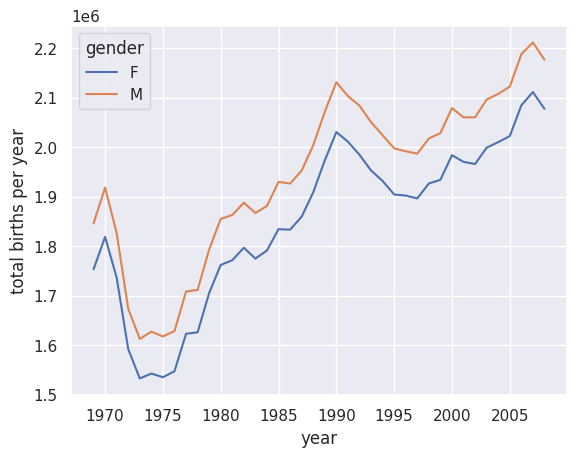

In [263]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

With a simple pivot table and ``plot()`` method, we can immediately see the annual trend in births by gender. By eye, it appears that over the past 50 years male births have outnumbered female births by around 5%.

### Further data exploration

Though this doesn't necessarily relate to the pivot table, there are a few more interesting features we can pull out of this dataset using the Pandas tools covered up to this point.
We must start by cleaning the data a bit, removing outliers caused by mistyped dates (e.g., June 31st) or missing values (e.g., June 99th).
One easy way to remove these all at once is to cut outliers; we'll do this via a robust sigma-clipping operation:

In [264]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution (You can learn more about sigma-clipping operations in a book I coauthored with Željko Ivezić, Andrew J. Connolly, and Alexander Gray: ["Statistics, Data Mining, and Machine Learning in Astronomy"](http://press.princeton.edu/titles/10159.html) (Princeton University Press, 2014)).

With this we can use the ``query()`` method (discussed further in [High-Performance Pandas: ``eval()`` and ``query()``](03.12-Performance-Eval-and-Query.ipynb)) to filter-out rows with births outside these values:

In [265]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

Next we set the ``day`` column to integers; previously it had been a string because some columns in the dataset contained the value ``'null'``:

In [266]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

<ipython-input-266-0903fe5331f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day'] = births['day'].astype(int)


Finally, we can combine the day, month, and year to create a Date index (see [Working with Time Series](03.11-Working-with-Time-Series.ipynb)).
This allows us to quickly compute the weekday corresponding to each row:

In [267]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

Using this we can plot births by weekday for several decades:

<ipython-input-268-750f1844e3eb>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


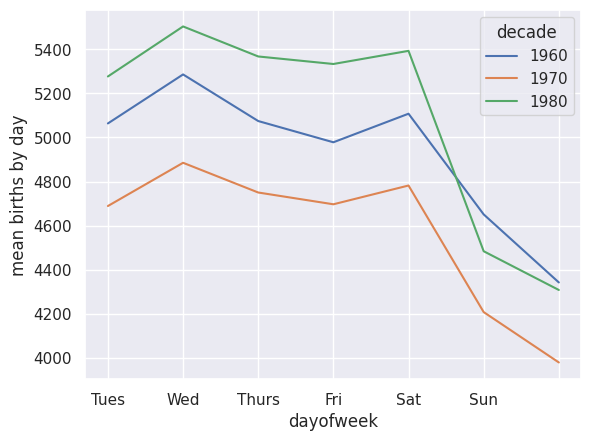

In [268]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

Apparently births are slightly less common on weekends than on weekdays! Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989.

Another intersting view is to plot the mean number of births by the day of the *year*.
Let's first group the data by month and day separately:

In [269]:
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

The result is a multi-index over months and days.
To make this easily plottable, let's turn these months and days into a date by associating them with a dummy year variable (making sure to choose a leap year so February 29th is correctly handled!)

In [270]:
births_by_date.index = [pd.Timestamp(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


Focusing on the month and day only, we now have a time series reflecting the average number of births by date of the year.
From this, we can use the ``plot`` method to plot the data. It reveals some interesting trends:

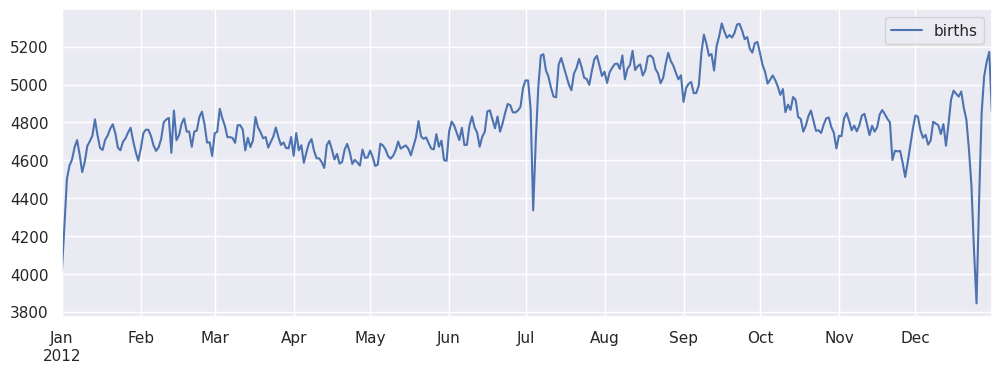

In [271]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In particular, the striking feature of this graph is the dip in birthrate on US holidays (e.g., Independence Day, Labor Day, Thanksgiving, Christmas, New Year's Day) although this likely reflects trends in scheduled/induced births rather than some deep psychosomatic effect on natural births.
For more discussion on this trend, see the analysis and links in [Andrew Gelman's blog post](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/) on the subject.
We'll return to this figure in [Example:-Effect-of-Holidays-on-US-Births](04.09-Text-and-Annotation.ipynb#Example:-Effect-of-Holidays-on-US-Births), where we will use Matplotlib's tools to annotate this plot.

Looking at this short example, you can see that many of the Python and Pandas tools we've seen to this point can be combined and used to gain insight from a variety of datasets.
We will see some more sophisticated applications of these data manipulations in future sections!

# Vectorized String Operations

One strength of Python is its relative ease in handling and manipulating string data.
Pandas builds on this and provides a comprehensive set of *vectorized string operations* that become an essential piece of the type of munging required when working with (read: cleaning up) real-world data.
In this section, we'll walk through some of the Pandas string operations, and then take a look at using them to partially clean up a very messy dataset of recipes collected from the Internet.

## Introducing Pandas String Operations

We saw in previous sections how tools like NumPy and Pandas generalize arithmetic operations so that we can easily and quickly perform the same operation on many array elements. For example:

In [272]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

This *vectorization* of operations simplifies the syntax of operating on arrays of data: we no longer have to worry about the size or shape of the array, but just about what operation we want done.
For arrays of strings, NumPy does not provide such simple access, and thus you're stuck using a more verbose loop syntax:

In [273]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

This is perhaps sufficient to work with some data, but it will break if there are any missing values.
For example:

In [274]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() if s is not None else None for s in data]

['Peter', 'Paul', None, 'Mary', 'Guido']

Pandas includes features to address both this need for vectorized string operations and for correctly handling missing data via the ``str`` attribute of Pandas Series and Index objects containing strings.
So, for example, suppose we create a Pandas Series with this data:

In [275]:
import pandas as pd
names = pd.Series(data)
names

,0
0,peter
1,Paul
2,None
3,MARY
4,gUIDO


We can now call a single method that will capitalize all the entries, while skipping over any missing values:

In [276]:
names.str.capitalize()

,0
0,Peter
1,Paul
2,None
3,Mary
4,Guido


Using tab completion on this ``str`` attribute will list all the vectorized string methods available to Pandas.

## Tables of Pandas String Methods

If you have a good understanding of string manipulation in Python, most of Pandas string syntax is intuitive enough that it's probably sufficient to just list a table of available methods; we will start with that here, before diving deeper into a few of the subtleties.
The examples in this section use the following series of names:

In [277]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

### Methods similar to Python string methods
Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas ``str`` methods that mirror Python string methods:

|             |                  |                  |                  |
|-------------|------------------|------------------|------------------|
|``len()``    | ``lower()``      | ``translate()``  | ``islower()``    |
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    |
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  |
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  |
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      |
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``rsplit()``     |
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  |
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |

Notice that these have various return values. Some, like ``lower()``, return a series of strings:

In [278]:
monte.str.lower()

,0
0,graham chapman
1,john cleese
2,terry gilliam
3,eric idle
4,terry jones
5,michael palin


But some others return numbers:

In [279]:
monte.str.len()

,0
0,14
1,11
2,13
3,9
4,11
5,13


Or Boolean values:

In [280]:
monte.str.startswith('T')

,0
0,False
1,False
2,True
3,False
4,True
5,False


Still others return lists or other compound values for each element:

In [281]:
monte.str.split()

,0
0,"[Graham, Chapman]"
1,"[John, Cleese]"
2,"[Terry, Gilliam]"
3,"[Eric, Idle]"
4,"[Terry, Jones]"
5,"[Michael, Palin]"


We'll see further manipulations of this kind of series-of-lists object as we continue our discussion.

### Methods using regular expressions

In addition, there are several methods that accept regular expressions to examine the content of each string element, and follow some of the API conventions of Python's built-in ``re`` module:

| Method | Description |
|--------|-------------|
| ``match()`` | Call ``re.match()`` on each element, returning a boolean. |
| ``extract()`` | Call ``re.match()`` on each element, returning matched groups as strings.|
| ``findall()`` | Call ``re.findall()`` on each element |
| ``replace()`` | Replace occurrences of pattern with some other string|
| ``contains()`` | Call ``re.search()`` on each element, returning a boolean |
| ``count()`` | Count occurrences of pattern|
| ``split()``   | Equivalent to ``str.split()``, but accepts regexps |
| ``rsplit()`` | Equivalent to ``str.rsplit()``, but accepts regexps |

With these, you can do a wide range of interesting operations.
For example, we can extract the first name from each by asking for a contiguous group of characters at the beginning of each element:

In [282]:
monte.str.extract('([A-Za-z]+)', expand=False)

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


Or we can do something more complicated, like finding all names that start and end with a consonant, making use of the start-of-string (``^``) and end-of-string (``$``) regular expression characters:

In [283]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

,0
0,[Graham Chapman]
1,[]
2,[Terry Gilliam]
3,[]
4,[Terry Jones]
5,[Michael Palin]


The ability to concisely apply regular expressions across ``Series`` or ``Dataframe`` entries opens up many possibilities for analysis and cleaning of data.

### Miscellaneous methods
Finally, there are some miscellaneous methods that enable other convenient operations:

| Method | Description |
|--------|-------------|
| ``get()`` | Index each element |
| ``slice()`` | Slice each element|
| ``slice_replace()`` | Replace slice in each element with passed value|
| ``cat()``      | Concatenate strings|
| ``repeat()`` | Repeat values |
| ``normalize()`` | Return Unicode form of string |
| ``pad()`` | Add whitespace to left, right, or both sides of strings|
| ``wrap()`` | Split long strings into lines with length less than a given width|
| ``join()`` | Join strings in each element of the Series with passed separator|
| ``get_dummies()`` | extract dummy variables as a dataframe |

#### Vectorized item access and slicing

The ``get()`` and ``slice()`` operations, in particular, enable vectorized element access from each array.
For example, we can get a slice of the first three characters of each array using ``str.slice(0, 3)``.
Note that this behavior is also available through Python's normal indexing syntax–for example, ``df.str.slice(0, 3)`` is equivalent to ``df.str[0:3]``:

In [284]:
monte.str[0:3]

,0
0,Gra
1,Joh
2,Ter
3,Eri
4,Ter
5,Mic


Indexing via ``df.str.get(i)`` and ``df.str[i]`` is likewise similar.

These ``get()`` and ``slice()`` methods also let you access elements of arrays returned by ``split()``.
For example, to extract the last name of each entry, we can combine ``split()`` and ``get()``:

In [285]:
monte.str.split().str.get(-1)

,0
0,Chapman
1,Cleese
2,Gilliam
3,Idle
4,Jones
5,Palin


#### Indicator variables

Another method that requires a bit of extra explanation is the ``get_dummies()`` method.
This is useful when your data has a column containing some sort of coded indicator.
For example, we might have a dataset that contains information in the form of codes, such as A="born in America," B="born in the United Kingdom," C="likes cheese," D="likes spam":

In [286]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


The ``get_dummies()`` routine lets you quickly split-out these indicator variables into a ``DataFrame``:

In [287]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


With these operations as building blocks, you can construct an endless range of string processing procedures when cleaning your data.

We won't dive further into these methods here, but I encourage you to read through ["Working with Text Data"](http://pandas.pydata.org/pandas-docs/stable/text.html) in the Pandas online documentation, or to refer to the resources listed in [Further Resources](03.13-Further-Resources.ipynb).

## Example: Recipe Database

These vectorized string operations become most useful in the process of cleaning up messy, real-world data.
Here I'll walk through an example of that, using an open recipe database compiled from various sources on the Web.
Our goal will be to parse the recipe data into ingredient lists, so we can quickly find a recipe based on some ingredients we have on hand.

The scripts used to compile this can be found at https://github.com/fictivekin/openrecipes, and the link to the current version of the database is found there as well.

As of Spring 2016, this database is about 30 MB, and can be downloaded and unzipped with these commands:

In [367]:
 !curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz
 !gunzip recipeitems-latest.json.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    20  100    20    0     0    235      0 --:--:-- --:--:-- --:--:--   238
gzip: recipeitems-latest.json already exists; do you wish to overwrite (y or n)? y


The database is in JSON format, so we will try ``pd.read_json`` to read it:

In [368]:
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print("ValueError:", e)

ValueError: Expected object or value


Oops! We get a ``ValueError`` mentioning that there is "trailing data."
Searching for the text of this error on the Internet, it seems that it's due to using a file in which *each line* is itself a valid JSON, but the full file is not.
Let's check if this interpretation is true:

In [353]:
with open('recipeitems-latest.json') as f:
    line = f.readline()
recipes = pd.read_json('recipeitems-latest.json', lines=True)

Yes, apparently each line is a valid JSON, so we'll need to string them together.
One way we can do this is to actually construct a string representation containing all these JSON entries, and then load the whole thing with ``pd.read_json``:

In [354]:
with open('recipeitems-latest.json', 'r') as f:
    # Read the entire file as a string
    file_content = f.read()
    # Wrap the file content with brackets to make it a valid JSON list
    valid_json_data = '[' + file_content[1:-1] + ']'
    # Parse the valid JSON data
    recipes_data = json.loads(valid_json_data)
    # Load the parsed data into a Pandas DataFrame
recipes = pd.DataFrame(recipes_data)

In [369]:
recipes.shape

(0, 0)

We see there are nearly 200,000 recipes, and 17 columns.
Let's take a look at one row to see what we have:

In [360]:
recipes.iloc[0]

IndexError: single positional indexer is out-of-bounds

There is a lot of information there, but much of it is in a very messy form, as is typical of data scraped from the Web.
In particular, the ingredient list is in string format; we're going to have to carefully extract the information we're interested in.
Let's start by taking a closer look at the ingredients:

In [316]:
recipes.ingredients.str.len().describe()

AttributeError: 'DataFrame' object has no attribute 'ingredients'

The ingredient lists average 250 characters long, with a minimum of 0 and a maximum of nearly 10,000 characters!

Just out of curiousity, let's see which recipe has the longest ingredient list:

In [336]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

AttributeError: 'DataFrame' object has no attribute 'name'

That certainly looks like an involved recipe.

We can do other aggregate explorations; for example, let's see how many of the recipes are for breakfast food:

In [347]:
recipes.description.str.contains('[Bb]reakfast').sum()

AttributeError: 'DataFrame' object has no attribute 'description'

Or how many of the recipes list cinnamon as an ingredient:

In [346]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

AttributeError: 'DataFrame' object has no attribute 'ingredients'

We could even look to see whether any recipes misspell the ingredient as "cinamon":

In [345]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

AttributeError: 'DataFrame' object has no attribute 'ingredients'

This is the type of essential data exploration that is possible with Pandas string tools.
It is data munging like this that Python really excels at.

### A simple recipe recommender

Let's go a bit further, and start working on a simple recipe recommendation system: given a list of ingredients, find a recipe that uses all those ingredients.
While conceptually straightforward, the task is complicated by the heterogeneity of the data: there is no easy operation, for example, to extract a clean list of ingredients from each row.
So we will cheat a bit: we'll start with a list of common ingredients, and simply search to see whether they are in each recipe's ingredient list.
For simplicity, let's just stick with herbs and spices for the time being:

In [337]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

We can then build a Boolean ``DataFrame`` consisting of True and False values, indicating whether this ingredient appears in the list:

In [338]:
import re
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                             for spice in spice_list))
spice_df.head()

AttributeError: 'DataFrame' object has no attribute 'ingredients'

Now, as an example, let's say we'd like to find a recipe that uses parsley, paprika, and tarragon.
We can compute this very quickly using the ``query()`` method of ``DataFrame``s, discussed in [High-Performance Pandas: ``eval()`` and ``query()``](03.12-Performance-Eval-and-Query.ipynb):

In [370]:
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

NameError: name 'spice_df' is not defined

We find only 10 recipes with this combination; let's use the index returned by this selection to discover the names of the recipes that have this combination:

In [ ]:
recipes.name[selection.index]

Now that we have narrowed down our recipe selection by a factor of almost 20,000, we are in a position to make a more informed decision about what we'd like to cook for dinner.

### Going further with recipes

Hopefully this example has given you a bit of a flavor (ba-dum!) for the types of data cleaning operations that are efficiently enabled by Pandas string methods.
Of course, building a very robust recipe recommendation system would require a *lot* more work!
Extracting full ingredient lists from each recipe would be an important piece of the task; unfortunately, the wide variety of formats used makes this a relatively time-consuming process.
This points to the truism that in data science, cleaning and munging of real-world data often comprises the majority of the work, and Pandas provides the tools that can help you do this efficiently.

# Working with Time Series

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data.
Date and time data comes in a few flavors, which we will discuss here:

- *Time stamps* reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
- *Time intervals* and *periods* reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
- *Time deltas* or *durations* reference an exact length of time (e.g., a duration of 22.56 seconds).

In this section, we will introduce how to work with each of these types of date/time data in Pandas.
This short section is by no means a complete guide to the time series tools available in Python or Pandas, but instead is intended as a broad overview of how you as a user should approach working with time series.
We will start with a brief discussion of tools for dealing with dates and times in Python, before moving more specifically to a discussion of the tools provided by Pandas.
After listing some resources that go into more depth, we will review some short examples of working with time series data in Pandas.

## Dates and Times in Python

The Python world has a number of available representations of dates, times, deltas, and timespans.
While the time series tools provided by Pandas tend to be the most useful for data science applications, it is helpful to see their relationship to other packages used in Python.

### Native Python dates and times: ``datetime`` and ``dateutil``

Python's basic objects for working with dates and times reside in the built-in ``datetime`` module.
Along with the third-party ``dateutil`` module, you can use it to quickly perform a host of useful functionalities on dates and times.
For example, you can manually build a date using the ``datetime`` type:

In [371]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

Or, using the ``dateutil`` module, you can parse dates from a variety of string formats:

In [372]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

Once you have a ``datetime`` object, you can do things like printing the day of the week:

In [373]:
date.strftime('%A')

'Saturday'

In the final line, we've used one of the standard string format codes for printing dates (``"%A"``), which you can read about in the [strftime section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) of Python's [datetime documentation](https://docs.python.org/3/library/datetime.html).
Documentation of other useful date utilities can be found in [dateutil's online documentation](http://labix.org/python-dateutil).
A related package to be aware of is [``pytz``](http://pytz.sourceforge.net/), which contains tools for working with the most migrane-inducing piece of time series data: time zones.

The power of ``datetime`` and ``dateutil`` lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in.
Where they break down is when you wish to work with large arrays of dates and times:
just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

### Typed arrays of times: NumPy's ``datetime64``

The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
The ``datetime64`` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.
The ``datetime64`` requires a very specific input format:

In [374]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Once we have this date formatted, however, we can quickly do vectorized operations on it:

In [375]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Because of the uniform type in NumPy ``datetime64`` arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's ``datetime`` objects, especially as arrays get large
(we introduced this type of vectorization in [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb)).

One detail of the ``datetime64`` and ``timedelta64`` objects is that they are built on a *fundamental time unit*.
Because the ``datetime64`` object is limited to 64-bit precision, the range of encodable times is $2^{64}$ times this fundamental unit.
In other words, ``datetime64`` imposes a trade-off between *time resolution* and *maximum time span*.

For example, if you want a time resolution of one nanosecond, you only have enough information to encode a range of $2^{64}$ nanoseconds, or just under 600 years.
NumPy will infer the desired unit from the input; for example, here is a day-based datetime:

In [376]:
np.datetime64('2015-07-04')

np.datetime64('2015-07-04')

Here is a minute-based datetime:

In [377]:
np.datetime64('2015-07-04 12:00')

np.datetime64('2015-07-04T12:00')

Notice that the time zone is automatically set to the local time on the computer executing the code.
You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time:

In [378]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

np.datetime64('2015-07-04T12:59:59.500000000')

The following table, drawn from the [NumPy datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), lists the available format codes along with the relative and absolute timespans that they can encode:

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

For the types of data we see in the real world, a useful default is ``datetime64[ns]``, as it can encode a useful range of modern dates with a suitably fine precision.

Finally, we will note that while the ``datetime64`` data type addresses some of the deficiencies of the built-in Python ``datetime`` type, it lacks many of the convenient methods and functions provided by ``datetime`` and especially ``dateutil``.
More information can be found in [NumPy's datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html).

### Dates and times in pandas: best of both worlds

Pandas builds upon all the tools just discussed to provide a ``Timestamp`` object, which combines the ease-of-use of ``datetime`` and ``dateutil`` with the efficient storage and vectorized interface of ``numpy.datetime64``.
From a group of these ``Timestamp`` objects, Pandas can construct a ``DatetimeIndex`` that can be used to index data in a ``Series`` or ``DataFrame``; we'll see many examples of this below.

For example, we can use Pandas tools to repeat the demonstration from above.
We can parse a flexibly formatted string date, and use format codes to output the day of the week:

In [379]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [380]:
date.strftime('%A')

'Saturday'

Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [381]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In the next section, we will take a closer look at manipulating time series data with the tools provided by Pandas.

## Pandas Time Series: Indexing by Time

Where the Pandas time series tools really become useful is when you begin to *index data by timestamps*.
For example, we can construct a ``Series`` object that has time indexed data:

In [382]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

,0
2014-07-04,0
2014-08-04,1
2015-07-04,2
2015-08-04,3


Now that we have this data in a ``Series``, we can make use of any of the ``Series`` indexing patterns we discussed in previous sections, passing values that can be coerced into dates:

In [383]:
data['2014-07-04':'2015-07-04']

,0
2014-07-04,0
2014-08-04,1
2015-07-04,2


There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [384]:
data['2015']

,0
2015-07-04,2
2015-08-04,3


Later, we will see additional examples of the convenience of dates-as-indices.
But first, a closer look at the available time series data structures.

## Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with time series data:

- For *time stamps*, Pandas provides the ``Timestamp`` type. As mentioned before, it is essentially a replacement for Python's native ``datetime``, but is based on the more efficient ``numpy.datetime64`` data type. The associated Index structure is ``DatetimeIndex``.
- For *time Periods*, Pandas provides the ``Period`` type. This encodes a fixed-frequency interval based on ``numpy.datetime64``. The associated index structure is ``PeriodIndex``.
- For *time deltas* or *durations*, Pandas provides the ``Timedelta`` type. ``Timedelta`` is a more efficient replacement for Python's native ``datetime.timedelta`` type, and is based on ``numpy.timedelta64``. The associated index structure is ``TimedeltaIndex``.

The most fundamental of these date/time objects are the ``Timestamp`` and ``DatetimeIndex`` objects.
While these class objects can be invoked directly, it is more common to use the ``pd.to_datetime()`` function, which can parse a wide variety of formats.
Passing a single date to ``pd.to_datetime()`` yields a ``Timestamp``; passing a series of dates by default yields a ``DatetimeIndex``:

In [385]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any ``DatetimeIndex`` can be converted to a ``PeriodIndex`` with the ``to_period()`` function with the addition of a frequency code; here we'll use ``'D'`` to indicate daily frequency:

In [386]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

A ``TimedeltaIndex`` is created, for example, when a date is subtracted from another:

In [387]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: ``pd.date_range()``

To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: ``pd.date_range()`` for timestamps, ``pd.period_range()`` for periods, and ``pd.timedelta_range()`` for time deltas.
We've seen that Python's ``range()`` and NumPy's ``np.arange()`` turn a startpoint, endpoint, and optional stepsize into a sequence.
Similarly, ``pd.date_range()`` accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates.
By default, the frequency is one day:

In [388]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternatively, the date range can be specified not with a start and endpoint, but with a startpoint and a number of periods:

In [389]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

The spacing can be modified by altering the ``freq`` argument, which defaults to ``D``.
For example, here we will construct a range of hourly timestamps:

In [390]:
pd.date_range('2015-07-03', periods=8, freq='H')

<ipython-input-390-c6d095693d58>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2015-07-03', periods=8, freq='H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

To create regular sequences of ``Period`` or ``Timedelta`` values, the very similar ``pd.period_range()`` and ``pd.timedelta_range()`` functions are useful.
Here are some monthly periods:

In [391]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

And a sequence of durations increasing by an hour:

In [392]:
pd.timedelta_range(0, periods=10, freq='H')

<ipython-input-392-80ed8e492879>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=10, freq='H')


TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='h')

All of these require an understanding of Pandas frequency codes, which we'll summarize in the next section.

## Frequencies and Offsets

Fundamental to these Pandas time series tools is the concept of a frequency or date offset.
Just as we saw the ``D`` (day) and ``H`` (hour) codes above, we can use such codes to specify any desired frequency spacing.
The following table summarizes the main codes available:

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period.
By adding an ``S`` suffix to any of these, they instead will be marked at the beginning:

| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | Month start            ||``BMS``  | Business month start   |
| ``QS``  | Quarter start          ||``BQS``  | Business quarter start |
| ``AS``  | Year start             ||``BAS``  | Business year start    |

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

On top of this, codes can be combined with numbers to specify other frequencies.
For example, for a frequency of 2 hours 30 minutes, we can combine the hour (``H``) and minute (``T``) codes as follows:

In [393]:
pd.timedelta_range(0, periods=9, freq="2H30T")

<ipython-input-393-87613b841d86>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=9, freq="2H30T")
<ipython-input-393-87613b841d86>:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.timedelta_range(0, periods=9, freq="2H30T")


TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150min')

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the ``pd.tseries.offsets`` module.
For example, we can create a business day offset directly as follows:

In [394]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

For more discussion of the use of frequencies and offsets, see the ["DateOffset" section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects) of the Pandas documentation.

## Resampling, Shifting, and Windowing

The ability to use dates and times as indices to intuitively organize and access data is an important piece of the Pandas time series tools.
The benefits of indexed data in general (automatic alignment during operations, intuitive data slicing and access, etc.) still apply, and Pandas provides several additional time series-specific operations.

We will take a look at a few of those here, using some stock price data as an example.
Because Pandas was developed largely in a finance context, it includes some very specific tools for financial data.
For example, the accompanying ``pandas-datareader`` package (installable via ``conda install pandas-datareader``), knows how to import financial data from a number of available sources, including Yahoo finance, Google Finance, and others.
Here we will load Google's closing price history:

In [405]:
!pip install yfinance pandas_datareader --upgrade

import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr

# Fetch Google (Alphabet) stock data directly using yfinance
goog = yf.download('GOOG', start='2004-01-01', end='2016-12-31')

# Display first few rows
print(goog.head())



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          GOOG      GOOG      GOOG      GOOG       GOOG
Date                                                         
2004-08-19  2.487352  2.579567  2.378775  2.478923  897427216
2004-08-20  2.684922  2.704009  2.491318  2.503960  458857488
2004-08-23  2.711942  2.813082  2.703266  2.745408  366857939
2004-08-24  2.599647  2.766478  2.567421  2.757554  306396159
2004-08-25  2.627658  2.677237  2.575105  2.601877  184645512


For simplicity, we'll use just the closing price:

In [406]:
goog = goog['Close']

We can visualize this using the ``plot()`` method, after the normal Matplotlib setup boilerplate (see [Chapter 4](04.00-Introduction-To-Matplotlib.ipynb)):

In [407]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

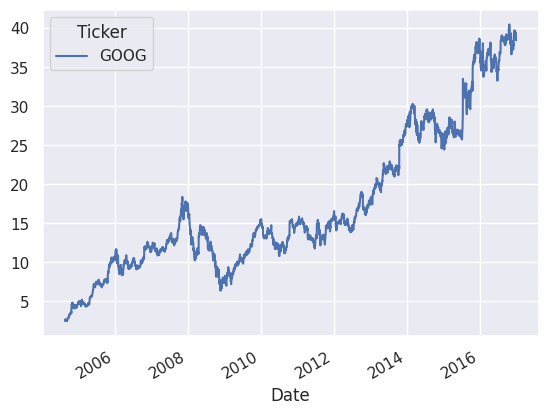

In [408]:
goog.plot();

### Resampling and converting frequencies

One common need for time series data is resampling at a higher or lower frequency.
This can be done using the ``resample()`` method, or the much simpler ``asfreq()`` method.
The primary difference between the two is that ``resample()`` is fundamentally a *data aggregation*, while ``asfreq()`` is fundamentally a *data selection*.

Taking a look at the Google closing price, let's compare what the two return when we down-sample the data.
Here we will resample the data at the end of business year:

<ipython-input-409-53e81abaf27a>:2: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  goog.resample('BA').mean().plot(style=':')
<ipython-input-409-53e81abaf27a>:3: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  goog.asfreq('BA').plot(style='--');


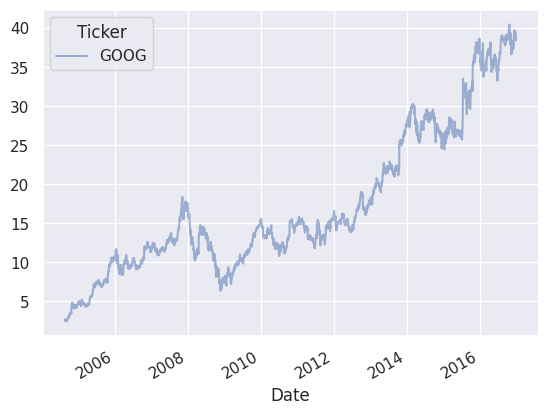

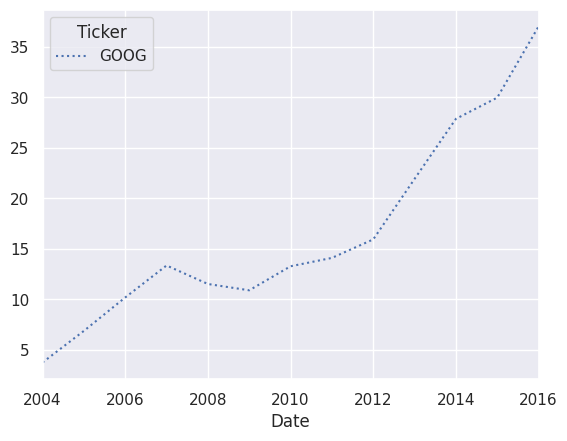

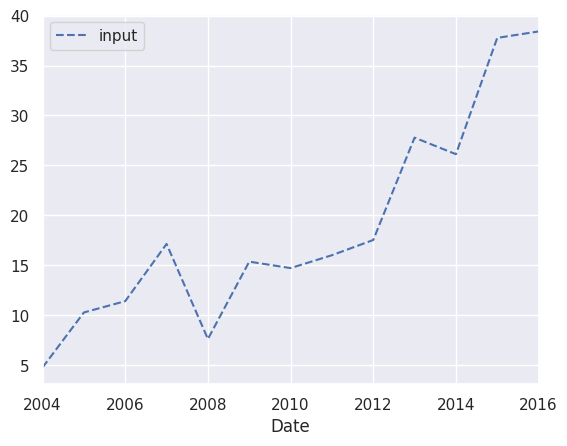

In [409]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Notice the difference: at each point, ``resample`` reports the *average of the previous year*, while ``asfreq`` reports the *value at the end of the year*.

For up-sampling, ``resample()`` and ``asfreq()`` are largely equivalent, though resample has many more options available.
In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values.
Just as with the ``pd.fillna()`` function discussed previously, ``asfreq()`` accepts a ``method`` argument to specify how values are imputed.
Here, we will resample the business day data at a daily frequency (i.e., including weekends):

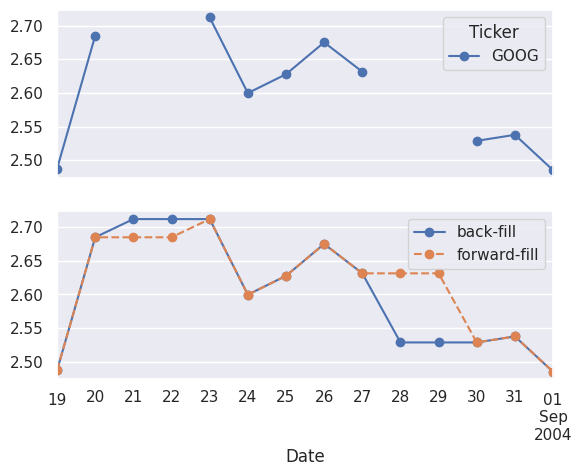

In [410]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

The top panel is the default: non-business days are left as NA values and do not appear on the plot.
The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

### Time-shifts

Another common time series-specific operation is shifting of data in time.
Pandas has two closely related methods for computing this: ``shift()`` and ``tshift()``
In short, the difference between them is that ``shift()`` *shifts the data*, while ``tshift()`` *shifts the index*.
In both cases, the shift is specified in multiples of the frequency.

Here we will both ``shift()`` and ``tshift()`` by 900 days;

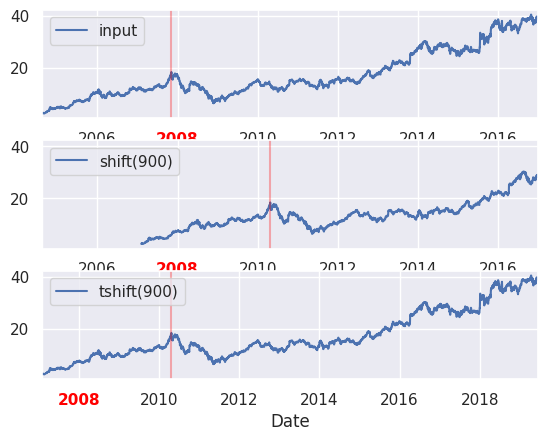

In [412]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.shift(900, freq='D').plot(ax=ax[2]) # Replace tshift with shift and freq='D'

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

We see here that ``shift(900)`` shifts the *data* by 900 days, pushing some of it off the end of the graph (and leaving NA values at the other end), while ``tshift(900)`` shifts the *index values* by 900 days.

A common context for this type of shift is in computing differences over time. For example, we use shifted values to compute the one-year return on investment for Google stock over the course of the dataset:

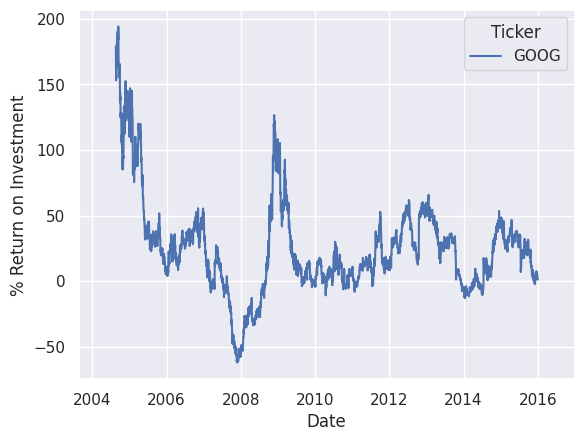

In [415]:
ROI = 100 * (goog.shift(-365, freq='D') / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

This helps us to see the overall trend in Google stock: thus far, the most profitable times to invest in Google have been (unsurprisingly, in retrospect) shortly after its IPO, and in the middle of the 2009 recession.

### Rolling windows

Rolling statistics are a third type of time series-specific operation implemented by Pandas.
These can be accomplished via the ``rolling()`` attribute of ``Series`` and ``DataFrame`` objects, which returns a view similar to what we saw with the ``groupby`` operation (see [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb)).
This rolling view makes available a number of aggregation operations by default.

For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices:

In [416]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

ValueError: If using all scalar values, you must pass an index

As with group-by operations, the ``aggregate()`` and ``apply()`` methods can be used for custom rolling computations.

## Where to Learn More

This section has provided only a brief summary of some of the most essential features of time series tools provided by Pandas; for a more complete discussion, you can refer to the ["Time Series/Date" section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html) of the Pandas online documentation.

Another excellent resource is the textbook [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) by Wes McKinney (OReilly, 2012).
Although it is now a few years old, it is an invaluable resource on the use of Pandas.
In particular, this book emphasizes time series tools in the context of business and finance, and focuses much more on particular details of business calendars, time zones, and related topics.

As always, you can also use the IPython help functionality to explore and try further options available to the functions and methods discussed here. I find this often is the best way to learn a new Python tool.

## Example: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

As of summer 2016, the CSV can be downloaded as follows:

In [482]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

Once this dataset is downloaded, we can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [483]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'FremontBridge.csv'

For convenience, we'll further process this dataset by shortening the column names and adding a "Total" column:

In [485]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Now let's take a look at the summary statistics for this data:

In [417]:
data.dropna().describe()

Ticker,GOOG
count,10.000000
mean,2.596945
std,0.082914
min,2.485120
25%,2.530980
50%,2.613652
75%,2.664099
max,2.711942


### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

In [418]:
%matplotlib inline
import seaborn; seaborn.set()

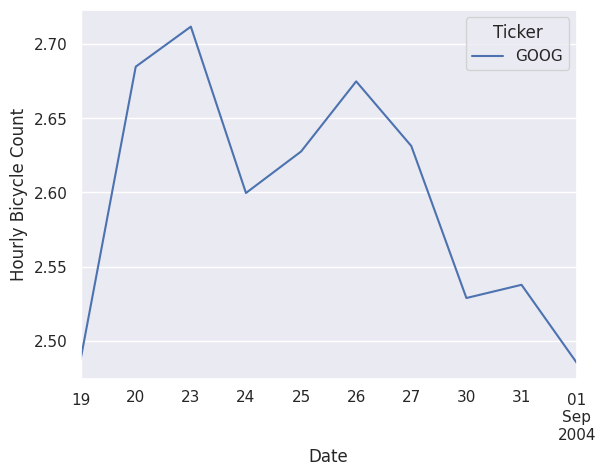

In [419]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

The ~25,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by week:

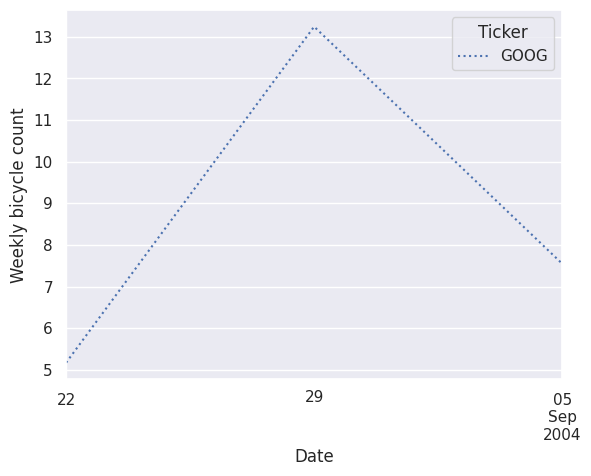

In [420]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather; see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) where we explore this further).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling_mean()`` function.
Here we'll do a 30 day rolling mean of our data, making sure to center the window:

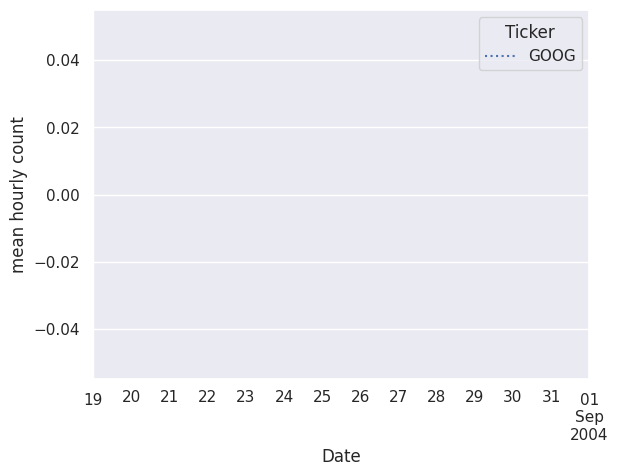

In [421]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

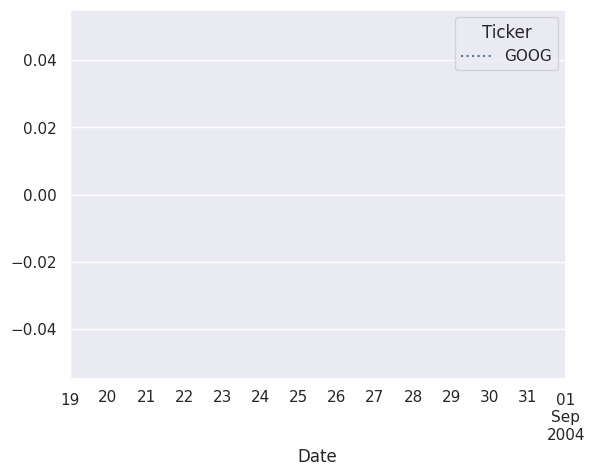

In [422]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality discussed in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb):

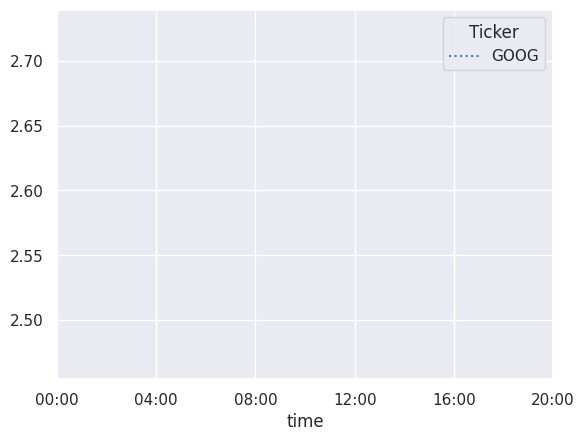

In [423]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

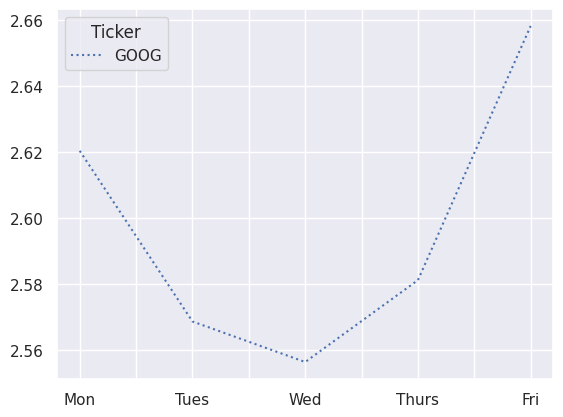

In [425]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']
by_weekday.plot(style=[':', '--', '-']);

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

In [426]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

Now we'll use some of the Matplotlib tools described in [Multiple Subplots](04.08-Multiple-Subplots.ipynb) to plot two panels side by side:

In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure data.index is a DatetimeIndex
data.index = pd.to_datetime(data.index)

weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

# Check the levels of index in by_time
print(by_time.index.levels)

# ... (your plotting code) ...

# Accessing data based on unique values
for name, group in by_time.groupby(level=0):
    if name == 'Weekday':
        group.plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
    else:  # Assuming the other unique value corresponds to 'Weekend'
        group.plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-'])

[['Weekday'], [00:00:00]]


The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see my blog post ["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), which uses a subset of this data.
We will also revisit this dataset in the context of modeling in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb).

# High-Performance Pandas: eval() and query()

As we've already seen in previous sections, the power of the PyData stack is built upon the ability of NumPy and Pandas to push basic operations into C via an intuitive syntax: examples are vectorized/broadcasted operations in NumPy, and grouping-type operations in Pandas.
While these abstractions are efficient and effective for many common use cases, they often rely on the creation of temporary intermediate objects, which can cause undue overhead in computational time and memory use.

As of version 0.13 (released January 2014), Pandas includes some experimental tools that allow you to directly access C-speed operations without costly allocation of intermediate arrays.
These are the ``eval()`` and ``query()`` functions, which rely on the [Numexpr](https://github.com/pydata/numexpr) package.
In this notebook we will walk through their use and give some rules-of-thumb about when you might think about using them.

## Motivating ``query()`` and ``eval()``: Compound Expressions

We've seen previously that NumPy and Pandas support fast vectorized operations; for example, when adding the elements of two arrays:

In [434]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(1000000)
y = rng.rand(1000000)
%timeit x + y

1.35 ms ± 63.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


As discussed in [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb), this is much faster than doing the addition via a Python loop or comprehension:

In [435]:
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype=x.dtype, count=len(x))

294 ms ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


But this abstraction can become less efficient when computing compound expressions.
For example, consider the following expression:

In [436]:
mask = (x > 0.5) & (y < 0.5)

Because NumPy evaluates each subexpression, this is roughly equivalent to the following:

In [437]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

In other words, *every intermediate step is explicitly allocated in memory*. If the ``x`` and ``y`` arrays are very large, this can lead to significant memory and computational overhead.
The Numexpr library gives you the ability to compute this type of compound expression element by element, without the need to allocate full intermediate arrays.
The [Numexpr documentation](https://github.com/pydata/numexpr) has more details, but for the time being it is sufficient to say that the library accepts a *string* giving the NumPy-style expression you'd like to compute:

In [438]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

True

The benefit here is that Numexpr evaluates the expression in a way that does not use full-sized temporary arrays, and thus can be much more efficient than NumPy, especially for large arrays.
The Pandas ``eval()`` and ``query()`` tools that we will discuss here are conceptually similar, and depend on the Numexpr package.

## ``pandas.eval()`` for Efficient Operations

The ``eval()`` function in Pandas uses string expressions to efficiently compute operations using ``DataFrame``s.
For example, consider the following ``DataFrame``s:

In [439]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

To compute the sum of all four ``DataFrame``s using the typical Pandas approach, we can just write the sum:

In [440]:
%timeit df1 + df2 + df3 + df4

94.9 ms ± 619 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


The same result can be computed via ``pd.eval`` by constructing the expression as a string:

In [441]:
%timeit pd.eval('df1 + df2 + df3 + df4')

63.5 ms ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The ``eval()`` version of this expression is about 50% faster (and uses much less memory), while giving the same result:

In [442]:
np.allclose(df1 + df2 + df3 + df4,
            pd.eval('df1 + df2 + df3 + df4'))

True

### Operations supported by ``pd.eval()``

As of Pandas v0.16, ``pd.eval()`` supports a wide range of operations.
To demonstrate these, we'll use the following integer ``DataFrame``s:

In [443]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

#### Arithmetic operators
``pd.eval()`` supports all arithmetic operators. For example:

In [444]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

#### Comparison operators
``pd.eval()`` supports all comparison operators, including chained expressions:

In [445]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

#### Bitwise operators
``pd.eval()`` supports the ``&`` and ``|`` bitwise operators:

In [446]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In addition, it supports the use of the literal ``and`` and ``or`` in Boolean expressions:

In [447]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

#### Object attributes and indices

``pd.eval()`` supports access to object attributes via the ``obj.attr`` syntax, and indexes via the ``obj[index]`` syntax:

In [448]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

#### Other operations
Other operations such as function calls, conditional statements, loops, and other more involved constructs are currently *not* implemented in ``pd.eval()``.
If you'd like to execute these more complicated types of expressions, you can use the Numexpr library itself.

## ``DataFrame.eval()`` for Column-Wise Operations

Just as Pandas has a top-level ``pd.eval()`` function, ``DataFrame``s have an ``eval()`` method that works in similar ways.
The benefit of the ``eval()`` method is that columns can be referred to *by name*.
We'll use this labeled array as an example:

In [449]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


Using ``pd.eval()`` as above, we can compute expressions with the three columns like this:

In [486]:
import pandas as pd
import numpy as np

# Create random data using numpy functions
data = np.random.rand(1000, 3)
df = pd.DataFrame(data, columns=['A', 'B', 'C'])

result1 = (df['A'] + df['B']) / (df['C'] - 1)
# Use df.eval for evaluating the expression
result2 = df.eval('A + B / (C - 1)')
np.allclose(result1, result2)

ValueError: Expression (A) + ((B) / ((C) - (np.float64(1.0)))) has forbidden control characters.

The ``DataFrame.eval()`` method allows much more succinct evaluation of expressions with the columns:

In [467]:
result3 = df.eval('(A + B) / (C - 1)', engine='python')

Notice here that we treat *column names as variables* within the evaluated expression, and the result is what we would wish.

### Assignment in DataFrame.eval()

In addition to the options just discussed, ``DataFrame.eval()``  also allows assignment to any column.
Let's use the ``DataFrame`` from before, which has columns ``'A'``, ``'B'``, and ``'C'``:

In [468]:
df.head()

,A,B,C
0,0.422150,0.887228,0.306079
1,0.656456,0.239615,0.054139
2,0.387326,0.903887,0.177825
3,0.276302,0.304941,0.206256
4,0.280991,0.740030,0.371163


We can use ``df.eval()`` to create a new column ``'D'`` and assign to it a value computed from the other columns:

In [469]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.422150,0.887228,0.306079,4.277908
1,0.656456,0.239615,0.054139,16.551176
2,0.387326,0.903887,0.177825,7.261152
3,0.276302,0.304941,0.206256,2.818075
4,0.280991,0.740030,0.371163,2.750871


In the same way, any existing column can be modified:

In [470]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.422150,0.887228,0.306079,-1.519471
1,0.656456,0.239615,0.054139,7.699397
2,0.387326,0.903887,0.177825,-2.904892
3,0.276302,0.304941,0.206256,-0.138850
4,0.280991,0.740030,0.371163,-1.236760


### Local variables in DataFrame.eval()

The ``DataFrame.eval()`` method supports an additional syntax that lets it work with local Python variables.
Consider the following:

In [471]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

The ``@`` character here marks a *variable name* rather than a *column name*, and lets you efficiently evaluate expressions involving the two "namespaces": the namespace of columns, and the namespace of Python objects.
Notice that this ``@`` character is only supported by the ``DataFrame.eval()`` *method*, not by the ``pandas.eval()`` *function*, because the ``pandas.eval()`` function only has access to the one (Python) namespace.

## DataFrame.query() Method

The ``DataFrame`` has another method based on evaluated strings, called the ``query()`` method.
Consider the following:

In [472]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

As with the example used in our discussion of ``DataFrame.eval()``, this is an expression involving columns of the ``DataFrame``.
It cannot be expressed using the ``DataFrame.eval()`` syntax, however!
Instead, for this type of filtering operation, you can use the ``query()`` method:

In [473]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

In addition to being a more efficient computation, compared to the masking expression this is much easier to read and understand.
Note that the ``query()`` method also accepts the ``@`` flag to mark local variables:

In [474]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

## Performance: When to Use These Functions

When considering whether to use these functions, there are two considerations: *computation time* and *memory use*.
Memory use is the most predictable aspect. As already mentioned, every compound expression involving NumPy arrays or Pandas ``DataFrame``s will result in implicit creation of temporary arrays:
For example, this:

In [475]:
x = df[(df.A < 0.5) & (df.B < 0.5)]

Is roughly equivalent to this:

In [476]:
tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]

If the size of the temporary ``DataFrame``s is significant compared to your available system memory (typically several gigabytes) then it's a good idea to use an ``eval()`` or ``query()`` expression.
You can check the approximate size of your array in bytes using this:

In [477]:
df.values.nbytes

32000

On the performance side, ``eval()`` can be faster even when you are not maxing-out your system memory.
The issue is how your temporary ``DataFrame``s compare to the size of the L1 or L2 CPU cache on your system (typically a few megabytes in 2016); if they are much bigger, then ``eval()`` can avoid some potentially slow movement of values between the different memory caches.
In practice, I find that the difference in computation time between the traditional methods and the ``eval``/``query`` method is usually not significant–if anything, the traditional method is faster for smaller arrays!
The benefit of ``eval``/``query`` is mainly in the saved memory, and the sometimes cleaner syntax they offer.

We've covered most of the details of ``eval()`` and ``query()`` here; for more information on these, you can refer to the Pandas documentation.
In particular, different parsers and engines can be specified for running these queries; for details on this, see the discussion within the ["Enhancing Performance" section](http://pandas.pydata.org/pandas-docs/dev/enhancingperf.html).

**Post Experiment Question :**

Note: Studentneed to answer these questions in typed manner or acreate apropriate code cells to demonstrate working.

Q1. What is role of isnull, notnull functions in data preprocessing ?

Q2. When will you use fillna method in data preprocessing step?

Q3. What does parameter inplace=True means ?

Q4. Name and Explain any three values that method parameter may have in fillna method.

Q5. Create a excel file containing 4 real numeric columns latitude, longitude, avg_temp, avg_humidity. Added manually 30 reocords and save file as weather.csv Upload this to your google drive and load it into a python variable weather_info. Show all statistical properties of the columns in this data set.

**References :**

- [Pandas online documentation](http://pandas.pydata.org/): This is the go-to source for complete documentation of the package. While the examples in the documentation tend to be small generated datasets, the description of the options is complete and generally very useful for understanding the use of various functions.

- [*Python for Data Analysis*](http://shop.oreilly.com/product/0636920023784.do) Written by Wes McKinney (the original creator of Pandas), this book contains much more detail on the Pandas package than we had room for in this chapter. In particular, he takes a deep dive into tools for time series, which were his bread and butter as a financial consultant. The book also has many entertaining examples of applying Pandas to gain insight from real-world datasets. Keep in mind, though, that the book is now several years old, and the Pandas package has quite a few new features that this book does not cover (but be on the lookout for a new edition in 2017).

- [Stack Overflow](http://stackoverflow.com/questions/tagged/pandas): Pandas has so many users that any question you have has likely been asked and answered on Stack Overflow. Using Pandas is a case where some Google-Fu is your best friend. Simply go to your favorite search engine and type in the question, problem, or error you're coming across–more than likely you'll find your answer on a Stack Overflow page.

- [Pandas on PyVideo](http://pyvideo.org/search?q=pandas): From PyCon to SciPy to PyData, many conferences have featured tutorials from Pandas developers and power users. The PyCon tutorials in particular tend to be given by very well-vetted presenters.

**Conclusion :**  Thus we have learned how to perform Data Manipulation using Pandas Library


Q.1) = When working with real-world datasets, missing values (null or NaN values) are common. The functions isnull() and notnull() in Pandas help detect and handle these missing values efficiently.

null()
*   Purpose: Identifies missing (NaN) values.
*   Returns: A Boolean DataFrame (True for missing values, False otherwise).

notnull()
*   Purpose: Identifies non-missing (valid) values.
*   Returns: A Boolean DataFrame (True for valid values, False for NaN).


Q.2) = The fillna() method in Pandas is used to replace missing values (NaNs) with meaningful data. You should use fillna() when you want to keep the existing data structure but handle missing values to avoid errors in analysis or machine learning models.

 Situations Where fillna() is Useful

1.   Replacing Missing Values with a Default Value

*   If missing values indicate unknown but valid data, you can fill them with a placeholder.

2.   Filling Missing Values with the Mean/Median/Mode
*   When dealing with numerical data, replacing missing values with the mean, median, or mode prevents data loss.

3.  Forward Fill (Fill Using Previous Values)

*  Useful for time-series data, where missing values can be replaced with the previous known value.

Q.3)= The inplace=True parameter in Pandas modifies the DataFrame directly without creating a new copy. It is used in methods like fillna(), dropna(), drop(), replace(), etc.             


In [481]:
import pandas as pd

# Sample DataFrame with missing values
df = pd.DataFrame({'Name': ['Alice', 'Bob', None], 'Age': [25, None, 30]})

# Fill missing values, but it does NOT modify df itself
df_filled = df.fillna("Unknown")

print(df)  # Original DataFrame remains unchanged

    Name   Age
0  Alice  25.0
1    Bob   NaN
2   None  30.0


Q.4) = The method parameter in fillna() determines how missing values (NaNs) are filled based on existing data. Here are three common values:



*   Description: Replaces NaN values with the previous valid value in the column.
*   Use Case: Useful in time-series data where the last known value should be carried forward.


In [480]:
import pandas as pd

df = pd.DataFrame({'Date': ['2024-04-01', '2024-04-02', '2024-04-03'],
                   'Stock Price': [100, None, 102]})

df['Stock Price'].fillna(method='ffill', inplace=True)  # Forward fill

print(df)


         Date  Stock Price
0  2024-04-01        100.0
1  2024-04-02        100.0
2  2024-04-03        102.0


<ipython-input-480-0a6de69d67d4>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stock Price'].fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-480-0a6de69d67d4>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Stock Price'].fillna(method='ffill', inplace=True)  # Forward fill


Q.5) =

1.   Step 1: Create and Save weather.csv

**Use Excel or any text editor to manually enter 30 records with 4 columns:**

*   latitude (random real numbers within a valid latitude range: -90 to 90)
*   longitude (random real numbers within -180 to 180)
*   avg_temp (random temperatures, e.g., -10 to 40°C)
*   avg_humidity (random humidity values, e.g., 20% to 100%)
*    Save this file as weather.csv in your local system or Google Drive.

2.   Step 2: Upload weather.csv to Google Drive

*   Open Google Drive → Click + New → Select File Upload.
*   Upload your weather.csv file.

3.   Step 3: Load weather.csv into Python

*   Mount Google Drive in Colab:
*   Load the CSV file:

4.    Step 4: Show Statistical Properties of the Data

*   count (number of records)
*   mean (average of each column)
*   std (standard deviation)
*   min, max (minimum and maximum values)
*   25%, 50% (median), 75% (quartiles)


In [479]:
        # Expected Output Example

#          latitude   longitude   avg_temp  avg_humidity
# count   30.000000   30.000000  30.000000    30.000000
# mean    12.345678   67.890123  25.678900    75.432100
# std      5.678900   12.345678   7.890123    10.123456
# min     -45.678900 -120.123456  -5.000000    30.000000
# 25%      10.000000   50.000000  20.000000    60.000000
# 50%      15.000000   75.000000  27.000000    80.000000
# 75%      20.000000   90.000000  32.000000    85.000000
# max      45.678900  150.123456  40.000000    98.000000